In [26]:
from FFNN import NeuralNetwork, train_network, train_network_momentum, train_network_stochastic_momentum
import activation_functions as af
import cost_functions as cf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np



### Generate data
Using the same function and seed for generating data as in project 1.

In [27]:
def generate_data(n, noise = True):
    # Fixed seed value to ensure consisten results across runs
    seed = 42
    np.random.seed(seed)
    # Creating an array with equally spaced data
    x = np.linspace(-1, 1, n)
    # Runges equation with noise
    if noise:
        y = 1 / (1 + 25*x**2) +  np.random.normal(0, 0.1, size=n)
    else:
        y = 1 / (1 + 25*x**2)
    return x, y


In [28]:
x, y = generate_data(50, noise = False)
x = x.reshape(-1,1)
y = y.reshape(-1,1)

### Train, test split with validation sat

In [29]:

# Split into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a validation set from the training data
# (60% train, 20% val, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)


### Scaling inputs

In [30]:
# Scale inputs
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_val   = scaler.transform(X_val)
x_test  = scaler.transform(X_test)

In [31]:
X_val.shape

(10, 1)

### Initializing and training neural network

In [32]:
#Initialize NN
nn = NeuralNetwork(
    network_input_size=X_train.shape[1],
    layer_output_sizes=[60, 70, 1],
    activation_funcs=[af.sigmoid, af.sigmoid, af.identity],
    cost_func=cf.mse)


train_network_stochastic_momentum(nn, X_train, y_train, eta=0.01, epochs=100)

y_val_pred = nn.predict(X_val)
val_loss = cf.mse(y_val, y_val_pred)
print("Validation loss:", val_loss)

y_test_pred = nn.predict(X_test)
test_loss = cf.mse(y_test, y_test_pred)
print("Final test loss:", test_loss)

print(y_test_pred)



Validation loss: 0.02512635885658266
Final test loss: 0.03951696256952403
[[ 0.32965416]
 [ 0.23572217]
 [ 0.54155739]
 [ 0.00152146]
 [ 0.48917576]
 [-0.1075824 ]
 [ 0.61227779]
 [ 0.61954926]
 [ 0.48645573]
 [ 0.55281677]]


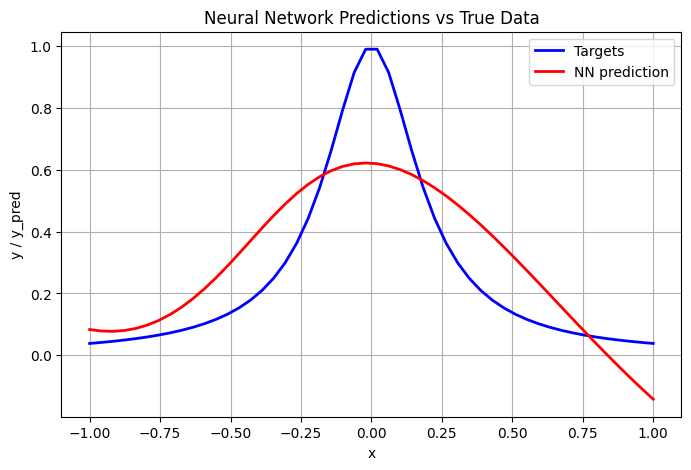

In [26]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', linewidth=2, label='Targets')
plt.plot(x, nn.predict(x), color='red', linewidth=2, label='NN prediction')
plt.title("Neural Network Predictions vs True Data")
plt.xlabel("x")
plt.ylabel("y / y_pred")
plt.legend()
plt.grid(True)
plt.show()


i = 10, j = 10
Validation loss: 0.04390969382692482
Final test loss: 0.057446533845234404


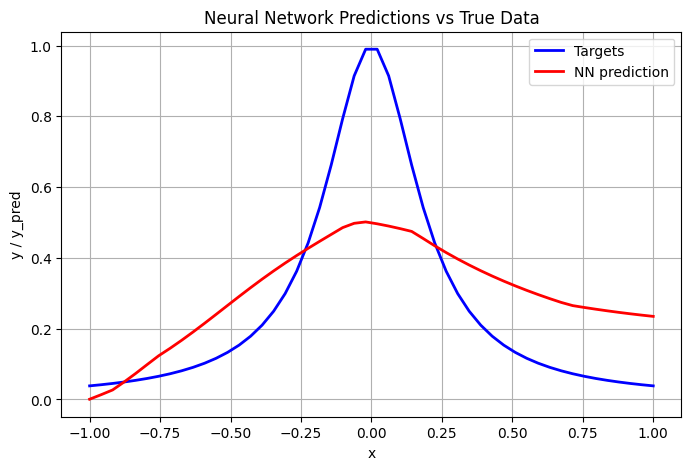

i = 10, j = 20
Validation loss: 0.0417123834863639
Final test loss: 0.05170349788083358
[[ 0.32498918]
 [ 0.17953646]
 [ 0.42705945]
 [-0.03497811]
 [ 0.42239031]
 [-0.13442368]
 [ 0.4905879 ]
 [ 0.49991757]
 [ 0.38690936]
 [ 0.45845807]]


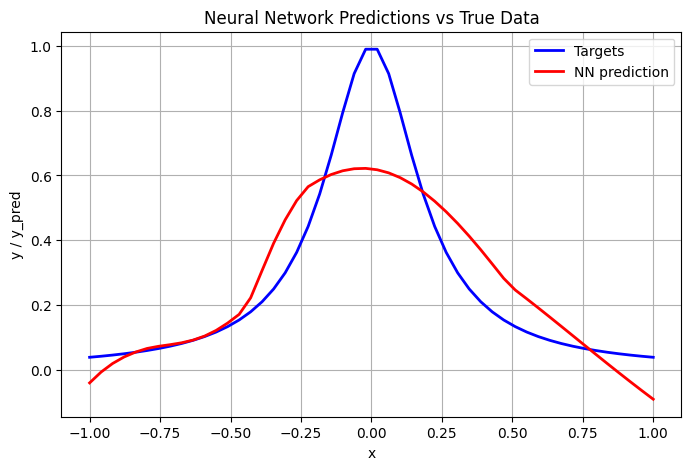

i = 10, j = 30
Validation loss: 0.06938795232594389
Final test loss: 0.09479982680289564
[[0.29241731]
 [0.18319891]
 [0.2845229 ]
 [0.06918466]
 [0.29241731]
 [0.02441365]
 [0.29241731]
 [0.29241731]
 [0.2642334 ]
 [0.29241731]]


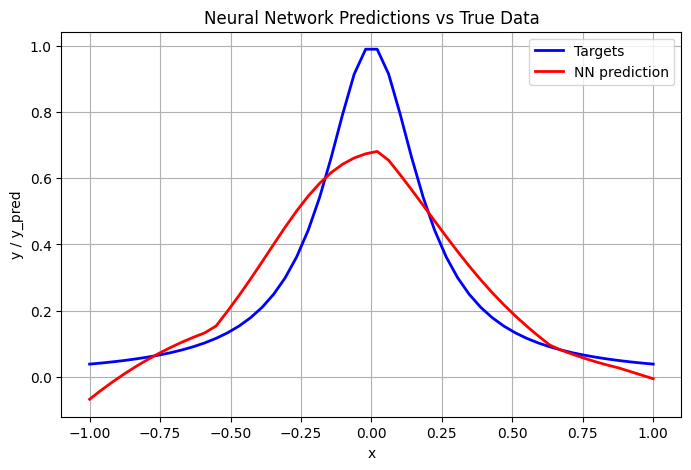

i = 10, j = 40
Validation loss: 0.022487962489939988
Final test loss: 0.036910430971111664
[[ 0.18277284]
 [ 0.11487968]
 [ 0.42454397]
 [-0.00396865]
 [ 0.35117869]
 [-0.02854523]
 [ 0.52362498]
 [ 0.54178207]
 [ 0.35835267]
 [ 0.44512638]]


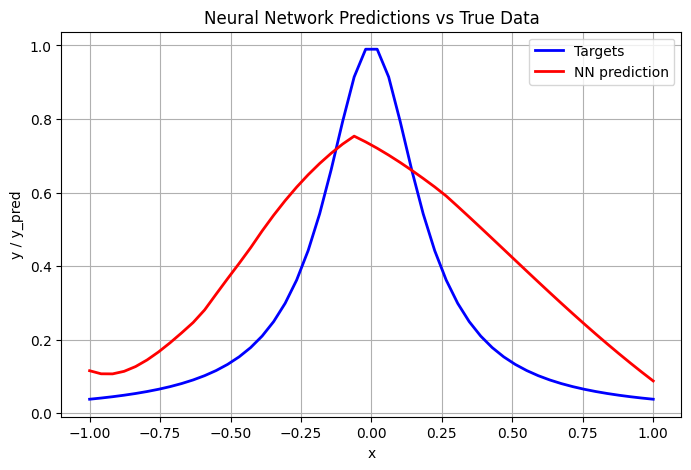

i = 10, j = 50
Validation loss: 0.0070152622517324886
Final test loss: 0.01563981488191185
[[ 0.10780892]
 [ 0.08735997]
 [ 0.44601384]
 [-0.0184581 ]
 [ 0.33592201]
 [-0.03643956]
 [ 0.66486495]
 [ 0.71226901]
 [ 0.33768353]
 [ 0.46836773]]


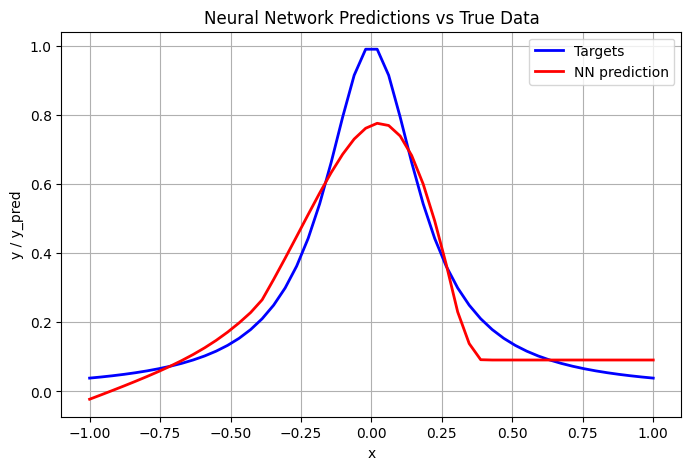

i = 10, j = 60
Validation loss: 0.0048083866774222776
Final test loss: 0.010228213204842084
[[0.19532284]
 [0.07660515]
 [0.54881802]
 [0.08916835]
 [0.40737842]
 [0.07481263]
 [0.7874296 ]
 [0.81032472]
 [0.39506736]
 [0.57308507]]


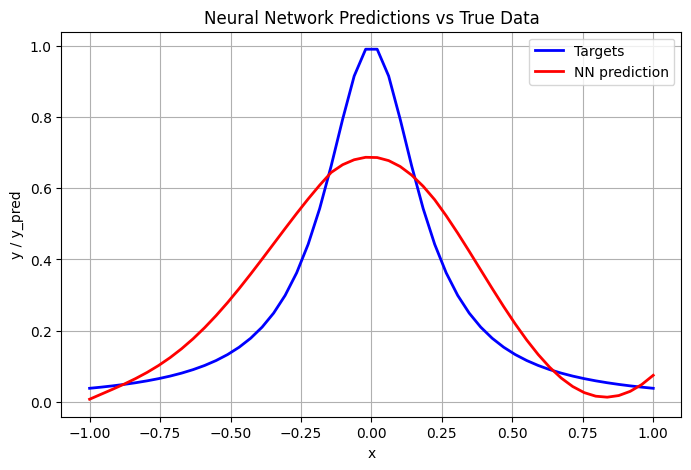

i = 10, j = 70
Validation loss: 0.005458611313405956
Final test loss: 0.01115332859237959
[[0.16638627]
 [0.12053879]
 [0.53620829]
 [0.05398333]
 [0.45375044]
 [0.07438151]
 [0.80318032]
 [0.82840421]
 [0.41232861]
 [0.60411022]]


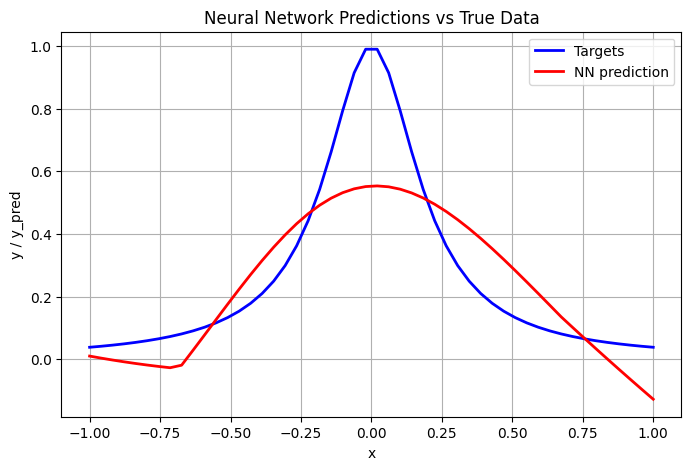

i = 10, j = 80
Validation loss: 0.01560987928737006
Final test loss: 0.018536187165247187
[[ 0.22259951]
 [ 0.09018188]
 [ 0.43491379]
 [-0.0088586 ]
 [ 0.36838596]
 [-0.03299636]
 [ 0.68715958]
 [ 0.652403  ]
 [ 0.32567983]
 [ 0.4404481 ]]


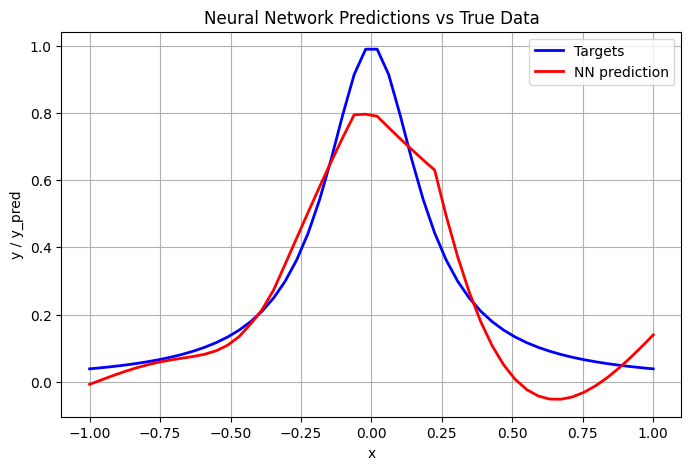

i = 10, j = 90
Validation loss: 0.022357272839409144
Final test loss: 0.033598729595400195
[[ 0.24707184]
 [ 0.23006786]
 [ 0.48316552]
 [ 0.07468942]
 [ 0.41904783]
 [-0.0366213 ]
 [ 0.57699631]
 [ 0.59852812]
 [ 0.43147884]
 [ 0.50648074]]


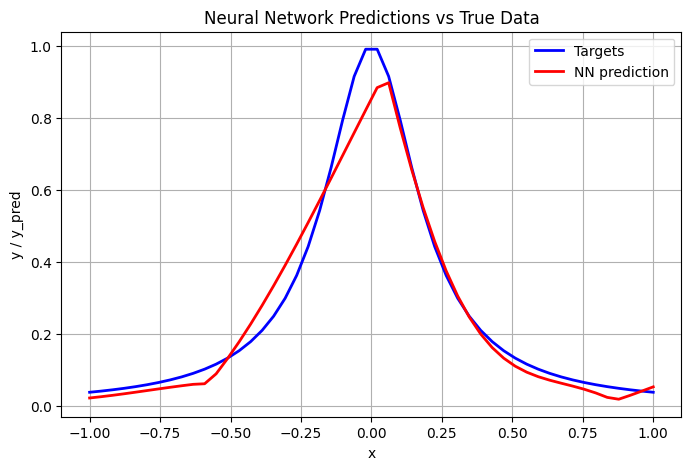

i = 10, j = 100
Validation loss: 0.0041108777535837845
Final test loss: 0.0048224782814762805
[[0.13030754]
 [0.10459073]
 [0.49115961]
 [0.0771725 ]
 [0.35370002]
 [0.02521345]
 [0.81122603]
 [0.83074938]
 [0.33349175]
 [0.50924956]]


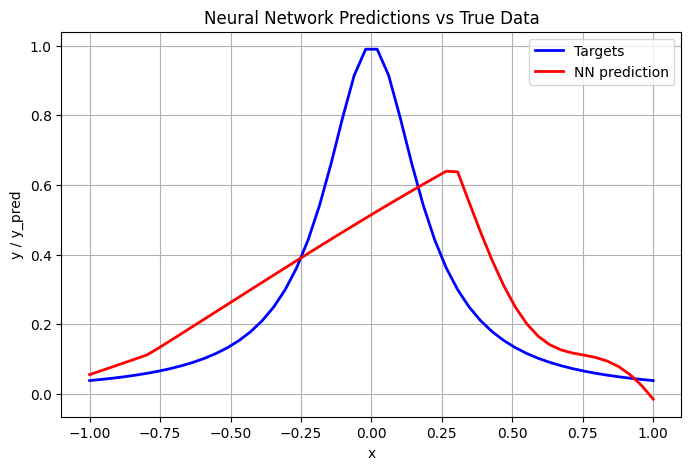

i = 20, j = 10
Validation loss: 0.009191499695049368
Final test loss: 0.01822604171578062
[[ 0.20806993]
 [ 0.13225561]
 [ 0.48273897]
 [ 0.03025075]
 [ 0.42202732]
 [-0.00138514]
 [ 0.67755991]
 [ 0.69582975]
 [ 0.38083972]
 [ 0.54345714]]


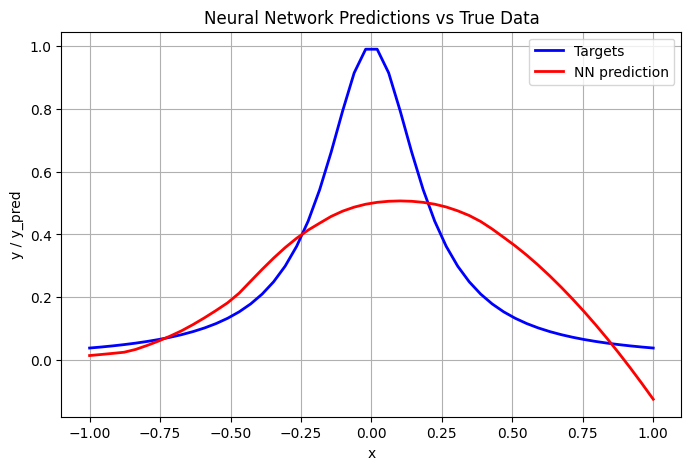

i = 20, j = 20
Validation loss: 0.02254095886837686
Final test loss: 0.03323818564700864
[[ 0.26747704]
 [ 0.24366728]
 [ 0.58098714]
 [ 0.04028299]
 [ 0.44690647]
 [-0.05745187]
 [ 0.64341539]
 [ 0.64202961]
 [ 0.51813707]
 [ 0.52161028]]


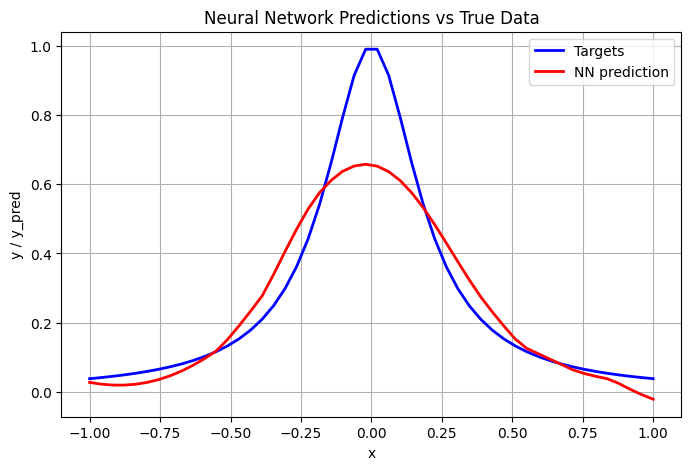

i = 20, j = 30
Validation loss: 0.004034629710435942
Final test loss: 0.00824066445260423
[[0.09917046]
 [0.07244044]
 [0.52813466]
 [0.08329709]
 [0.31718396]
 [0.0901065 ]
 [0.77686115]
 [0.79591445]
 [0.36309953]
 [0.52699538]]


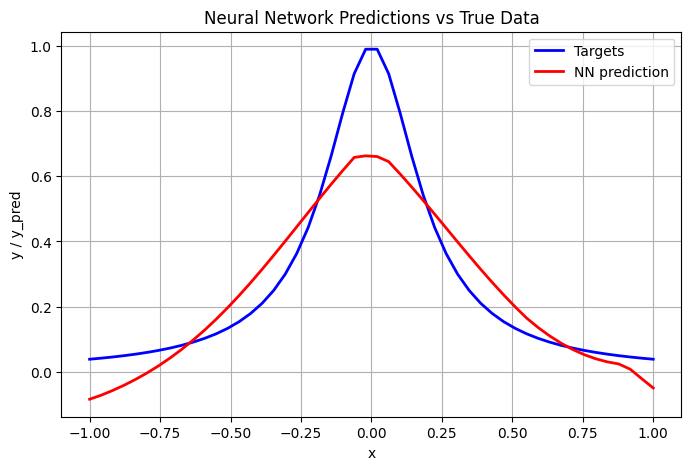

i = 20, j = 40
Validation loss: 0.013410809451157784
Final test loss: 0.023158984022607295
[[ 0.15405593]
 [ 0.16736548]
 [ 0.46939924]
 [ 0.01178457]
 [ 0.37323644]
 [-0.05770117]
 [ 0.62728751]
 [ 0.6461634 ]
 [ 0.3598659 ]
 [ 0.51613925]]


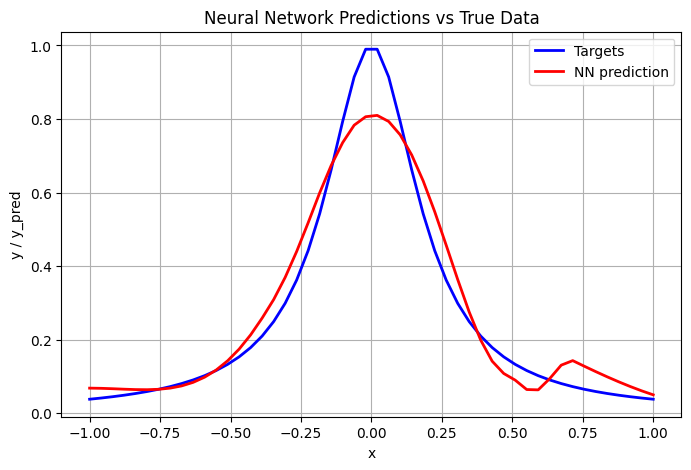

i = 20, j = 50
Validation loss: 0.019995609917442498
Final test loss: 0.03370029146268391
[[ 0.21511589]
 [ 0.21903617]
 [ 0.48879081]
 [-0.00252663]
 [ 0.39181919]
 [-0.12507229]
 [ 0.58625091]
 [ 0.60299447]
 [ 0.43542639]
 [ 0.48913913]]


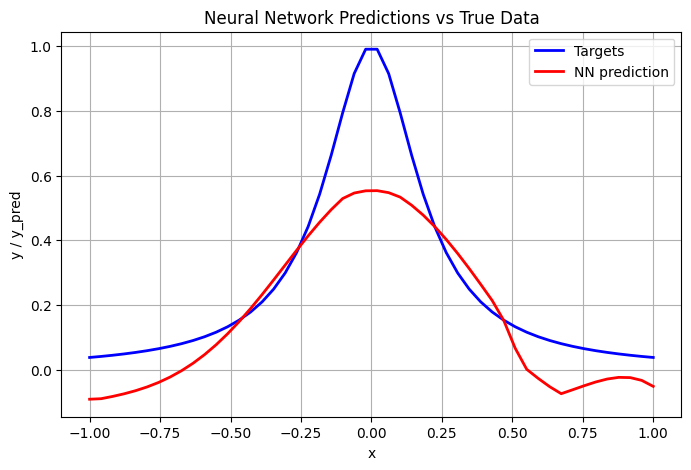

i = 20, j = 60
Validation loss: 0.004386735420513687
Final test loss: 0.0073646413896053115
[[0.12889444]
 [0.13863592]
 [0.52890597]
 [0.0674393 ]
 [0.36922187]
 [0.0535916 ]
 [0.79643541]
 [0.80759839]
 [0.34693391]
 [0.54094187]]


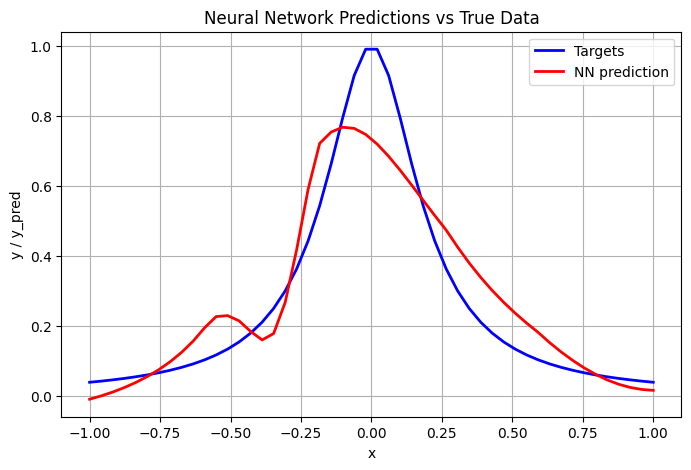

i = 20, j = 70
Validation loss: 0.004469474148342275
Final test loss: 0.008283218013589414
[[0.18625845]
 [0.07294659]
 [0.50862482]
 [0.0024768 ]
 [0.38229531]
 [0.08666842]
 [0.76043899]
 [0.82923695]
 [0.39996884]
 [0.51555231]]


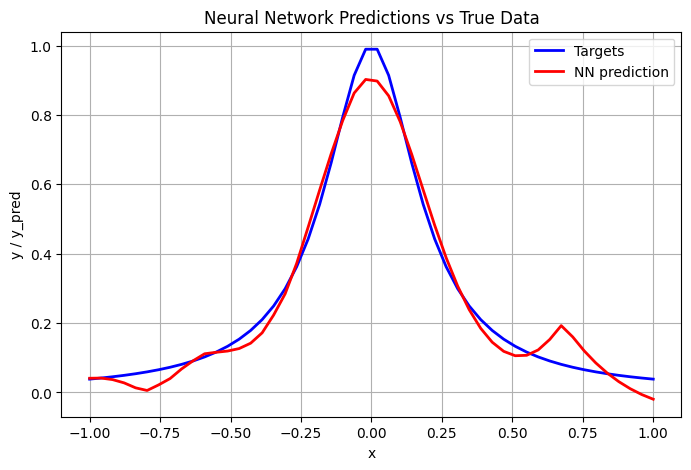

i = 20, j = 80
Validation loss: 0.014859686219371485
Final test loss: 0.017113575041786754
[[0.18827198]
 [0.02814844]
 [0.50073785]
 [0.02455355]
 [0.36799046]
 [0.05725437]
 [0.67669308]
 [0.68096198]
 [0.34808612]
 [0.47397605]]


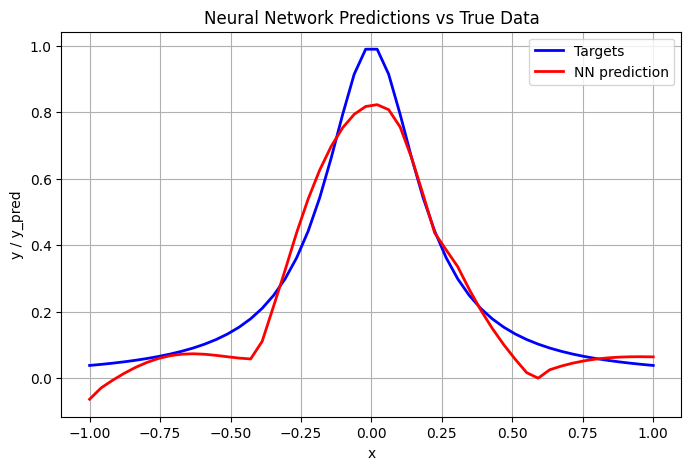

i = 20, j = 90
Validation loss: 0.007899769307557468
Final test loss: 0.007310913024376956
[[0.14158642]
 [0.07455907]
 [0.45034387]
 [0.02933863]
 [0.34739363]
 [0.01124248]
 [0.76888436]
 [0.77797629]
 [0.26266019]
 [0.47333702]]


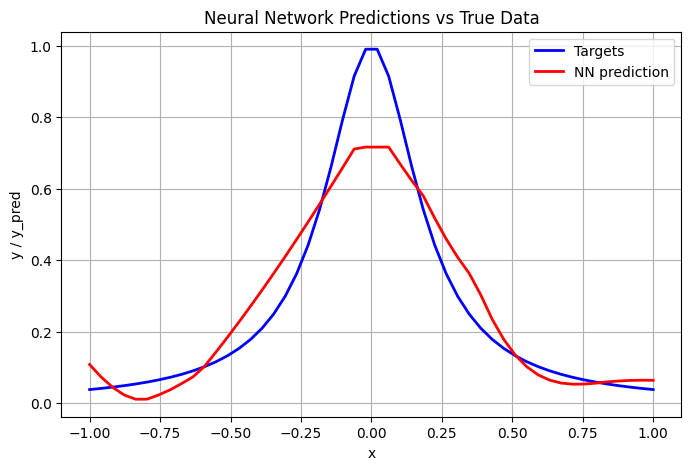

i = 20, j = 100
Validation loss: 0.012866352537191445
Final test loss: 0.020699422761611224
[[ 0.01797655]
 [ 0.09721065]
 [ 0.41922166]
 [-0.0012475 ]
 [ 0.29744462]
 [-0.0384664 ]
 [ 0.63602567]
 [ 0.67181176]
 [ 0.30358591]
 [ 0.44681377]]


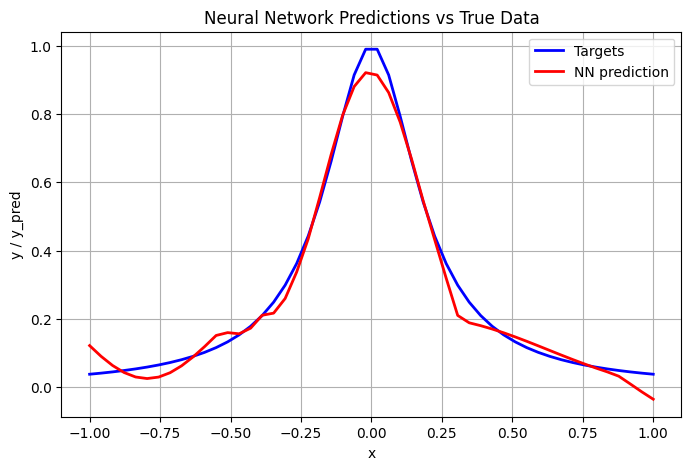

i = 30, j = 10
Validation loss: 0.00855824802297731
Final test loss: 0.014629016891283278
[[0.22565   ]
 [0.08149284]
 [0.53519558]
 [0.03772488]
 [0.40701217]
 [0.02551241]
 [0.72791051]
 [0.73041328]
 [0.40725532]
 [0.52156342]]


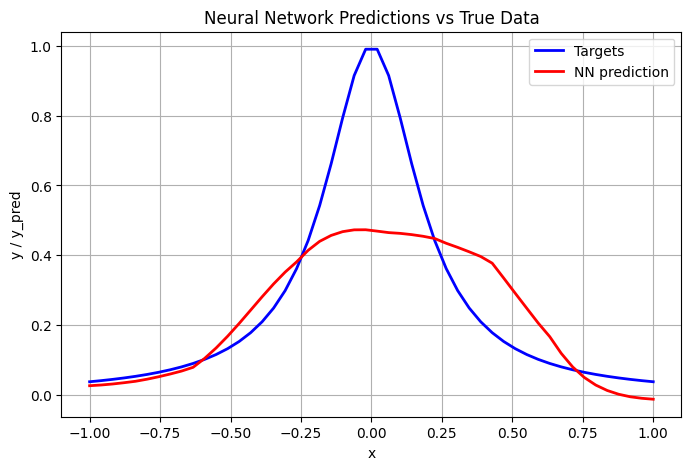

i = 30, j = 20
Validation loss: 0.006050467604774596
Final test loss: 0.014377974730013596
[[0.17647227]
 [0.11114312]
 [0.57176086]
 [0.05823964]
 [0.42016264]
 [0.10660532]
 [0.76140992]
 [0.78177704]
 [0.45718583]
 [0.56903815]]


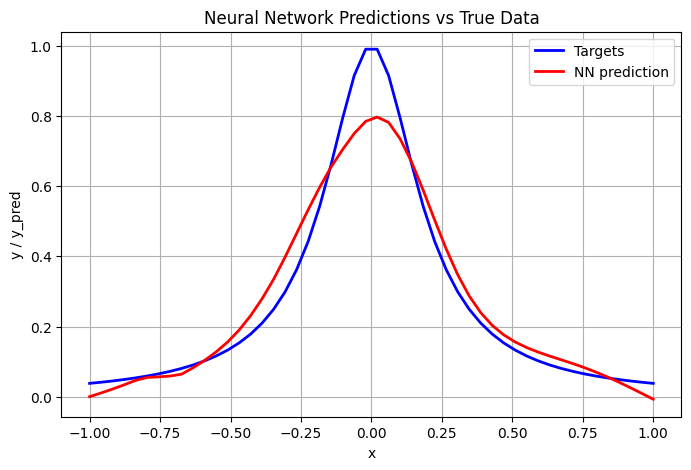

i = 30, j = 30
Validation loss: 0.007210082906170081
Final test loss: 0.015818406317552283
[[0.12576029]
 [0.06568672]
 [0.50096048]
 [0.06217786]
 [0.3938708 ]
 [0.06446331]
 [0.68935166]
 [0.71673882]
 [0.37822884]
 [0.55070283]]


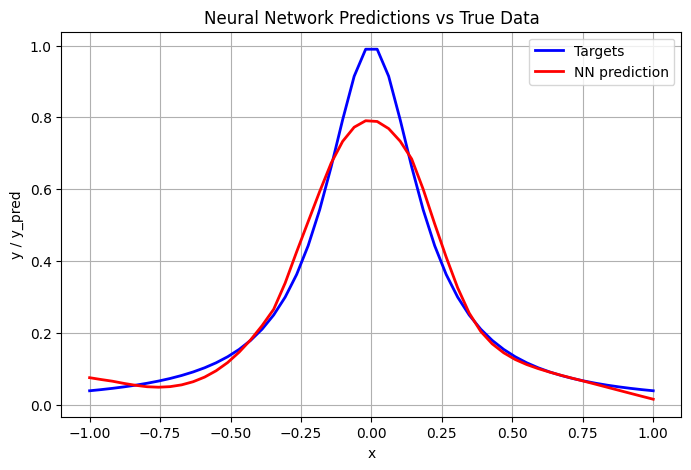

i = 30, j = 40
Validation loss: 0.002360139290206959
Final test loss: 0.005732430496708807
[[0.12633732]
 [0.14438587]
 [0.51532633]
 [0.06844474]
 [0.3213303 ]
 [0.05405246]
 [0.80976769]
 [0.83948213]
 [0.35957533]
 [0.54983501]]


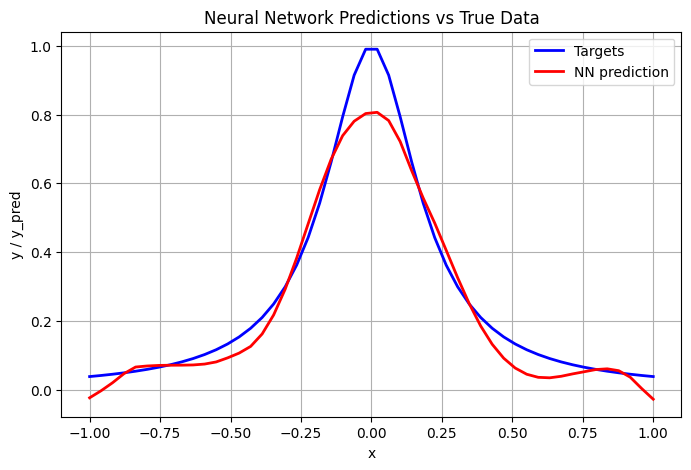

i = 30, j = 50
Validation loss: 0.013535408371056401
Final test loss: 0.02014013606479249
[[ 0.20534307]
 [ 0.23480488]
 [ 0.45982993]
 [ 0.07467637]
 [ 0.42080728]
 [-0.04913157]
 [ 0.68463708]
 [ 0.7063741 ]
 [ 0.40738592]
 [ 0.55525835]]


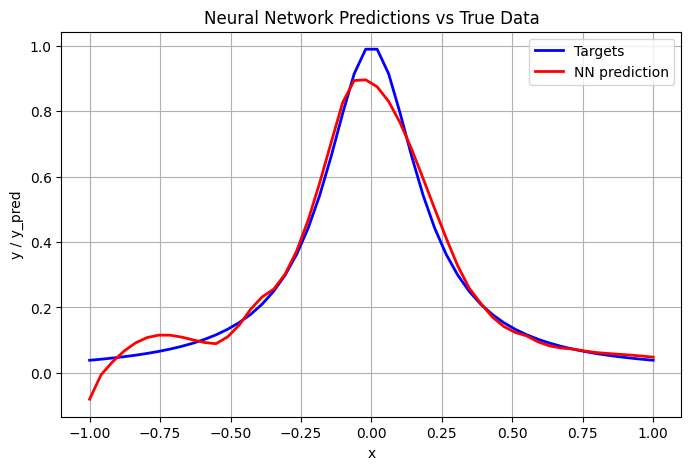

i = 30, j = 60
Validation loss: 0.0024931863133151903
Final test loss: 0.0029517991194941834
[[0.14487634]
 [0.10772468]
 [0.47201435]
 [0.0586474 ]
 [0.32922245]
 [0.04079861]
 [0.81696694]
 [0.86310007]
 [0.31144016]
 [0.48679073]]


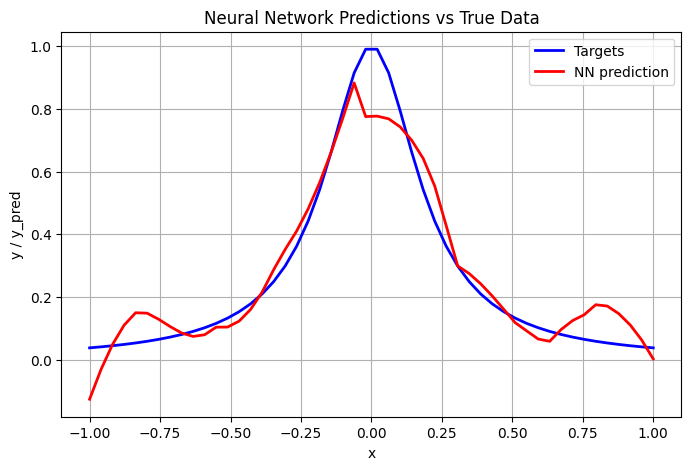

i = 30, j = 70
Validation loss: 0.007693553127683805
Final test loss: 0.010003623917513825
[[0.08359409]
 [0.05047364]
 [0.47577807]
 [0.02463193]
 [0.28746083]
 [0.01228868]
 [0.73930836]
 [0.75688008]
 [0.32760012]
 [0.50421611]]


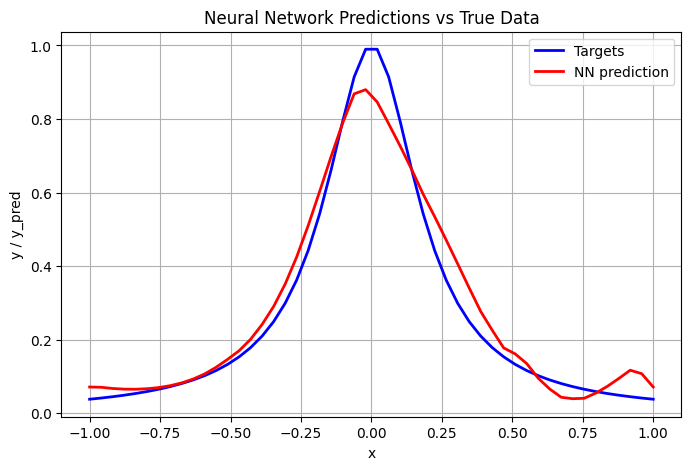

i = 30, j = 80
Validation loss: 0.002082870360262056
Final test loss: 0.006996675514720589
[[0.13875931]
 [0.09278552]
 [0.51362513]
 [0.04750287]
 [0.2945318 ]
 [0.06327595]
 [0.76492567]
 [0.83244984]
 [0.39510775]
 [0.53086766]]


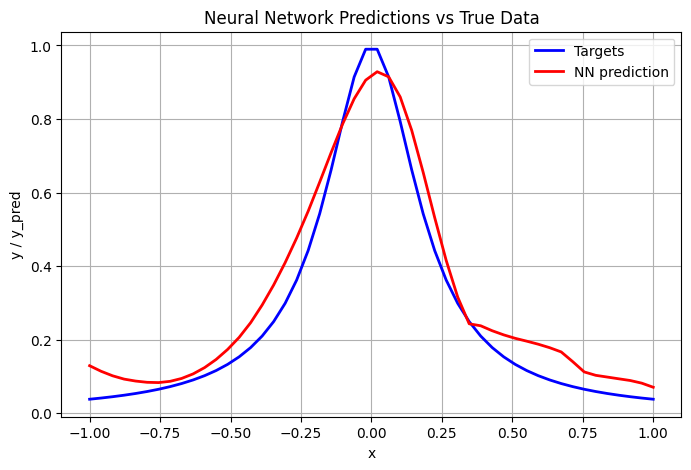

i = 30, j = 90
Validation loss: 0.0022259616419616863
Final test loss: 0.004054440650970032
[[0.18250228]
 [0.13208776]
 [0.50623329]
 [0.05394257]
 [0.27044894]
 [0.04499819]
 [0.80779042]
 [0.84111559]
 [0.30627453]
 [0.46405155]]


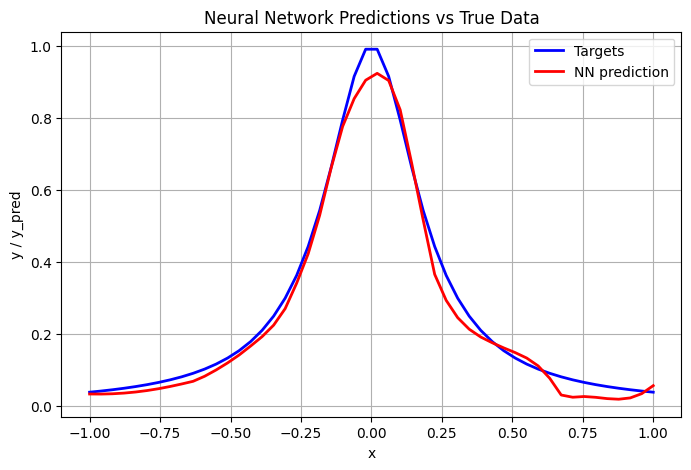

i = 30, j = 100
Validation loss: 0.002174916779051706
Final test loss: 0.0038113350790612266
[[0.14856157]
 [0.06308243]
 [0.49005811]
 [0.06675719]
 [0.338149  ]
 [0.05012556]
 [0.82040474]
 [0.85696866]
 [0.32802002]
 [0.51494989]]


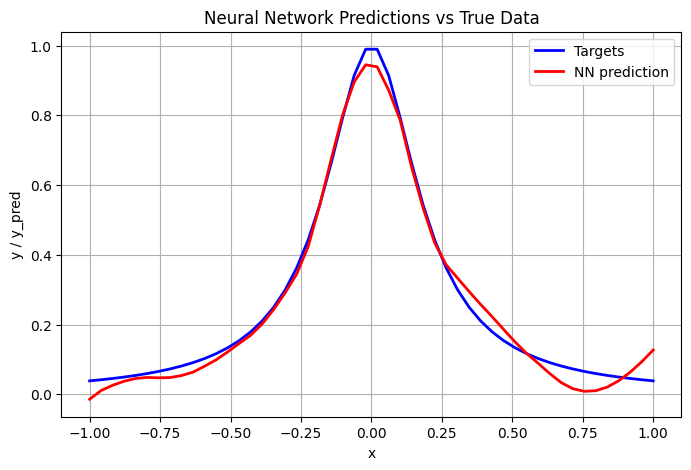

i = 40, j = 10
Validation loss: 0.011911378662323122
Final test loss: 0.022472465941861315
[[0.17017699]
 [0.10223106]
 [0.49310689]
 [0.02823291]
 [0.37150688]
 [0.02809283]
 [0.62908038]
 [0.64384239]
 [0.3865409 ]
 [0.5273133 ]]


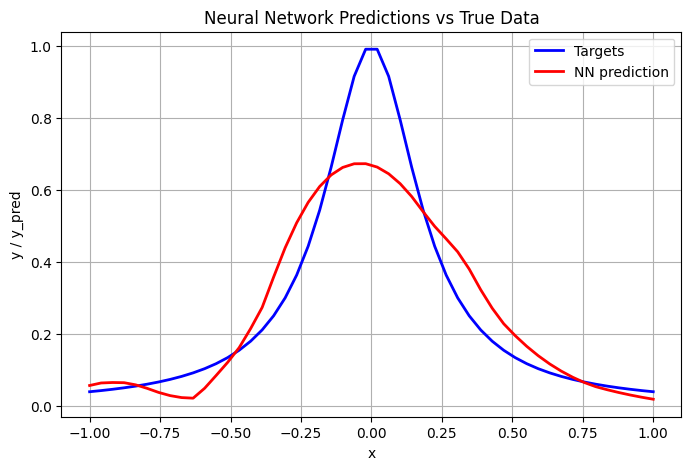

i = 40, j = 20
Validation loss: 0.0037002486082223012
Final test loss: 0.00474528115823147
[[ 0.13529191]
 [ 0.20956135]
 [ 0.35162286]
 [-0.00468115]
 [ 0.34789643]
 [ 0.02933881]
 [ 0.93144867]
 [ 0.92114447]
 [ 0.20370612]
 [ 0.52802213]]


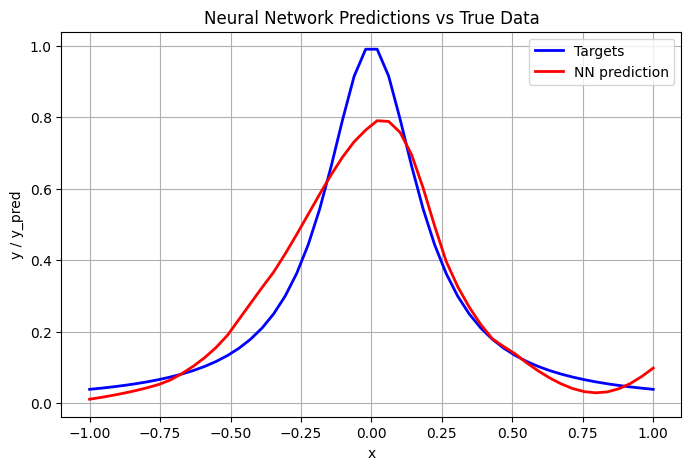

i = 40, j = 30
Validation loss: 0.010316430116931286
Final test loss: 0.018213555292146924
[[0.24494876]
 [0.12946095]
 [0.48890362]
 [0.01585955]
 [0.4152124 ]
 [0.03327007]
 [0.67160369]
 [0.70104539]
 [0.38006207]
 [0.52703577]]


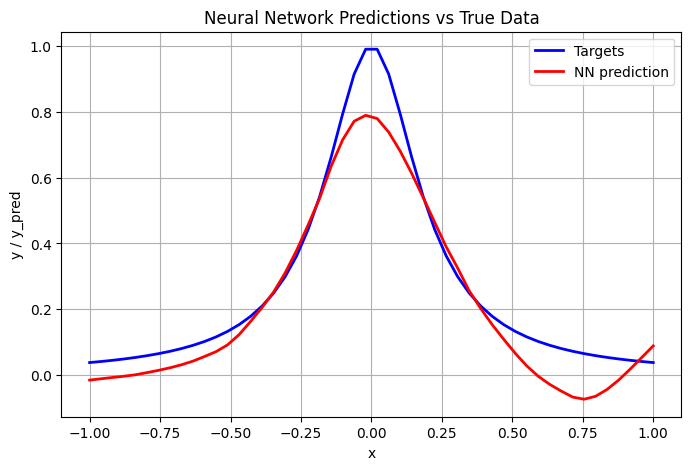

i = 40, j = 40
Validation loss: 0.0032304139514524794
Final test loss: 0.005031186369483479
[[0.10063029]
 [0.04897871]
 [0.48118155]
 [0.04974559]
 [0.32012645]
 [0.03682376]
 [0.79963441]
 [0.83285498]
 [0.31297172]
 [0.51117405]]


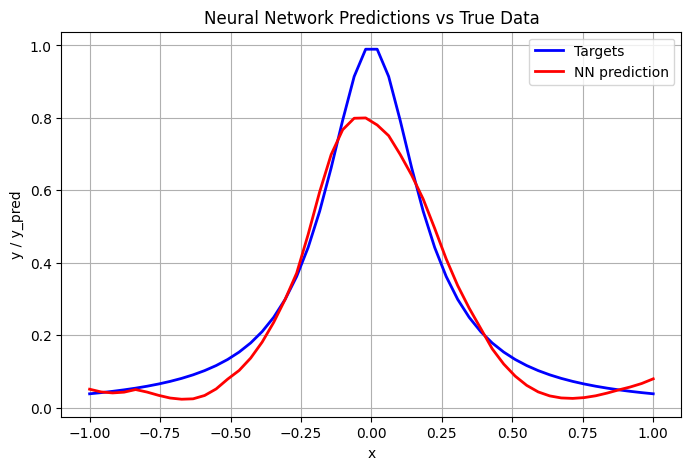

i = 40, j = 50
Validation loss: 0.0012721818789181748
Final test loss: 0.002168580441077595
[[0.14309443]
 [0.11840702]
 [0.46082688]
 [0.021722  ]
 [0.27931398]
 [0.03264715]
 [0.83260569]
 [0.87954801]
 [0.30453278]
 [0.46754302]]


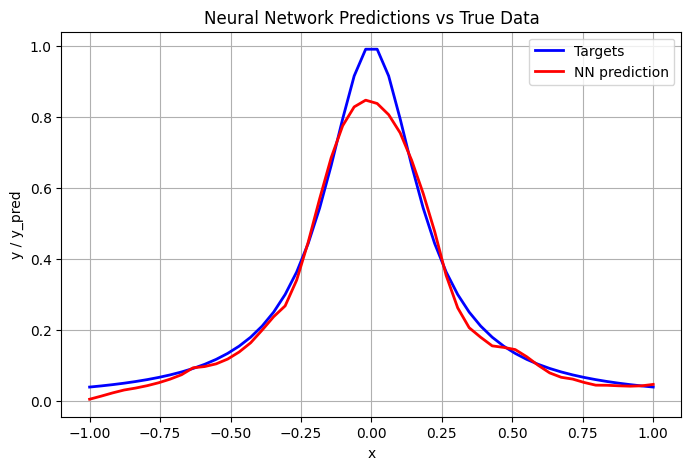

i = 40, j = 60
Validation loss: 0.011362899171706829
Final test loss: 0.018342605596212275
[[1.14884406e-01]
 [2.81294714e-02]
 [4.85747049e-01]
 [2.85000689e-04]
 [3.44212360e-01]
 [2.98368754e-03]
 [6.58818403e-01]
 [6.81613527e-01]
 [3.60476858e-01]
 [5.06926092e-01]]


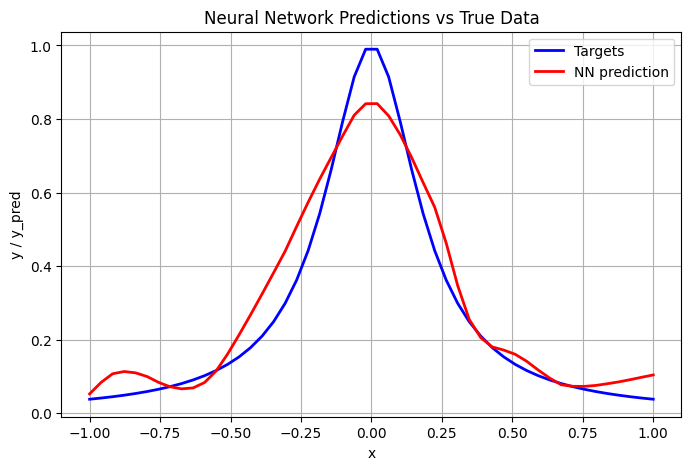

i = 40, j = 70
Validation loss: 0.003921312316619069
Final test loss: 0.002552891085622369
[[0.05591335]
 [0.08350865]
 [0.41358799]
 [0.04263872]
 [0.29016567]
 [0.02477978]
 [0.85214589]
 [0.90100412]
 [0.2639978 ]
 [0.47877646]]


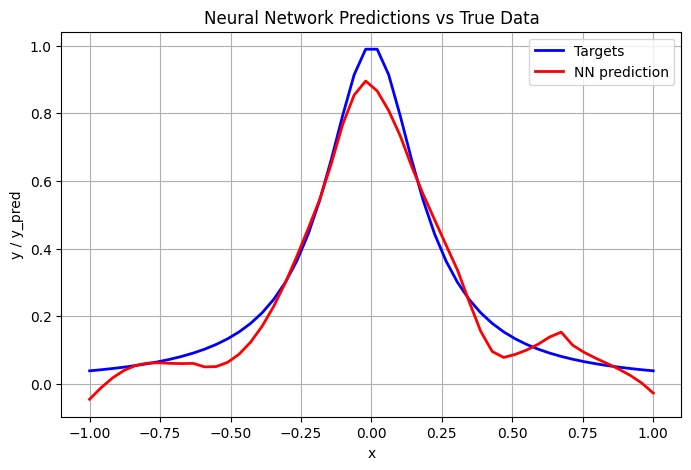

i = 40, j = 80
Validation loss: 0.0031176224833566195
Final test loss: 0.002355891188421043
[[0.15466387]
 [0.05556675]
 [0.48603935]
 [0.11143645]
 [0.35207554]
 [0.07504531]
 [0.88064587]
 [0.91681166]
 [0.31438364]
 [0.51715453]]


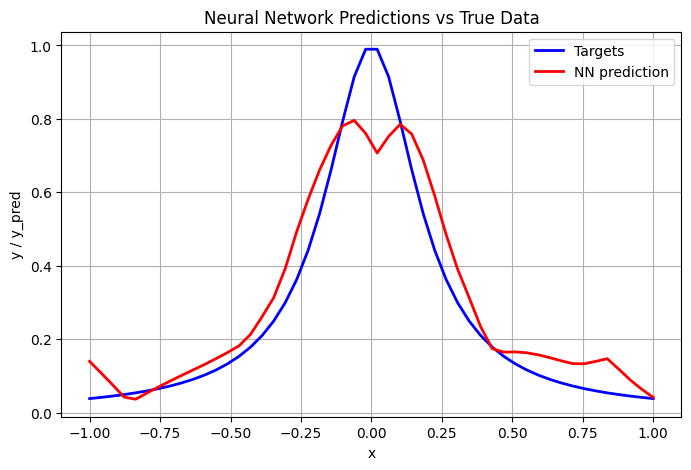

i = 40, j = 90
Validation loss: 0.0036024562187499574
Final test loss: 0.004234672528375999
[[0.17544239]
 [0.05484688]
 [0.37183702]
 [0.11706825]
 [0.30355704]
 [0.03723879]
 [1.00099397]
 [1.08703949]
 [0.30077771]
 [0.32585201]]


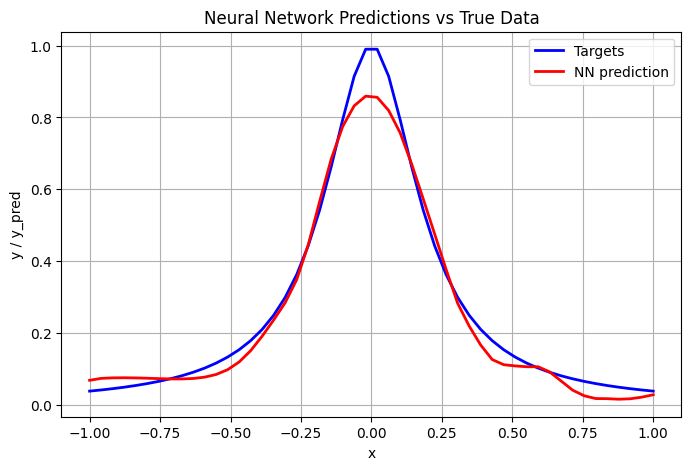

i = 40, j = 100
Validation loss: 0.002875375494950368
Final test loss: 0.00576390710684719
[[ 0.07373372]
 [ 0.05624555]
 [ 0.47112153]
 [ 0.06265187]
 [ 0.29376799]
 [-0.0063861 ]
 [ 0.78220438]
 [ 0.82446767]
 [ 0.32709457]
 [ 0.42387615]]


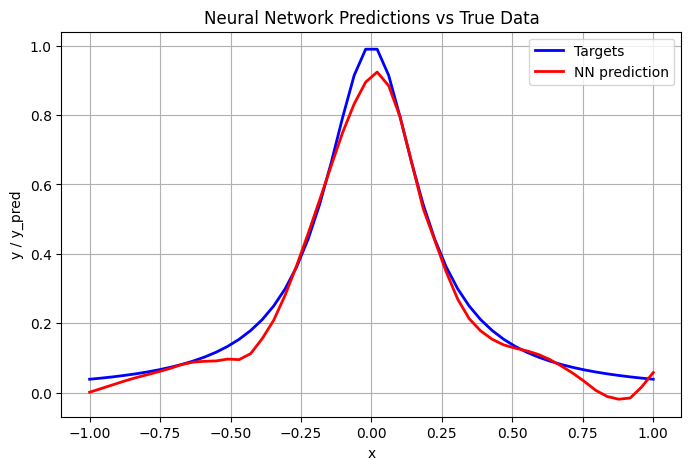

i = 50, j = 10
Validation loss: 0.007242927547693558
Final test loss: 0.011931744119153972
[[0.25295358]
 [0.16080321]
 [0.45638915]
 [0.0713383 ]
 [0.41931596]
 [0.01310281]
 [0.72983087]
 [0.77158946]
 [0.31415452]
 [0.53458211]]


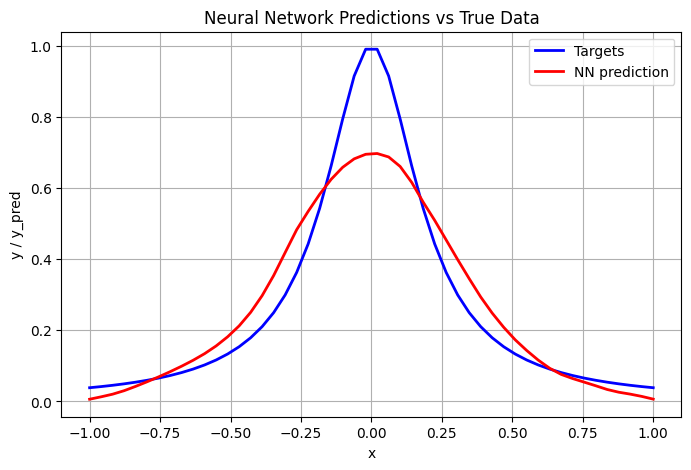

i = 50, j = 20
Validation loss: 0.004494224202098942
Final test loss: 0.008492277729285912
[[0.18928497]
 [0.11464182]
 [0.51958669]
 [0.06458323]
 [0.35018146]
 [0.04967585]
 [0.75551896]
 [0.78055591]
 [0.36780747]
 [0.47587735]]


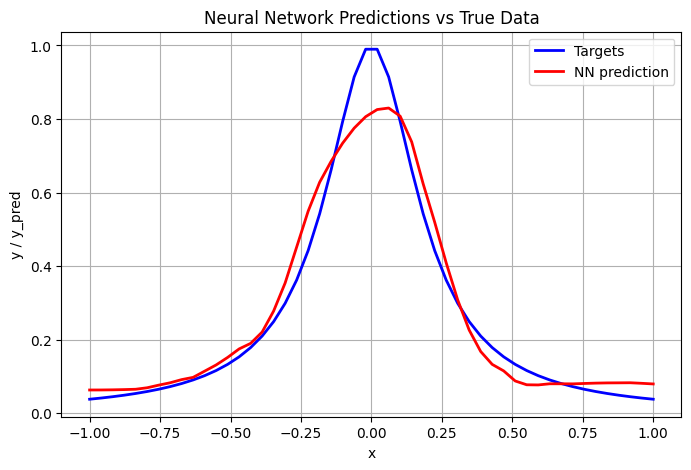

i = 50, j = 30
Validation loss: 0.0020617706166257558
Final test loss: 0.0032844764950514457
[[0.10210372]
 [0.08408519]
 [0.45272066]
 [0.05744126]
 [0.31353916]
 [0.02803236]
 [0.81404756]
 [0.85533551]
 [0.28602971]
 [0.47506777]]


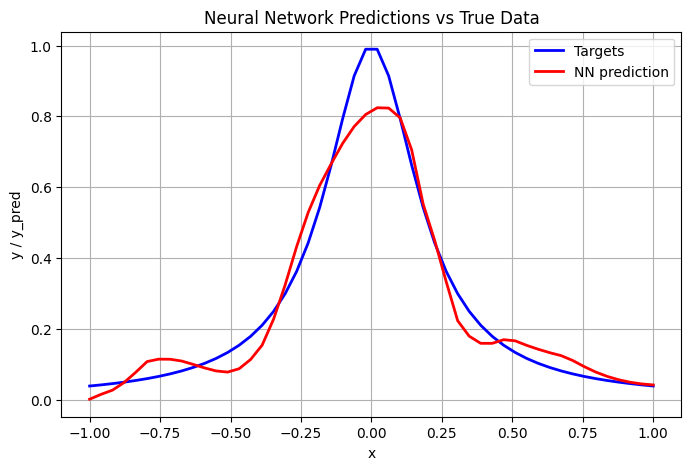

i = 50, j = 40
Validation loss: 0.004486545867222924
Final test loss: 0.0033983528174902403
[[0.11679133]
 [0.07932457]
 [0.47419016]
 [0.04720966]
 [0.2730743 ]
 [0.04366834]
 [0.81175785]
 [0.8527671 ]
 [0.31226517]
 [0.47271344]]


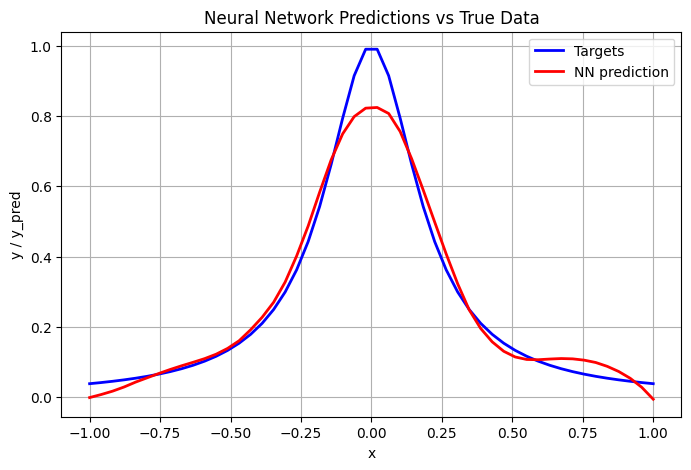

i = 50, j = 50
Validation loss: 0.0025449472215634227
Final test loss: 0.0026213503095874817
[[0.1625837 ]
 [0.04634715]
 [0.46089128]
 [0.04673197]
 [0.34111377]
 [0.07609701]
 [0.84177668]
 [0.88042995]
 [0.32832617]
 [0.48238843]]


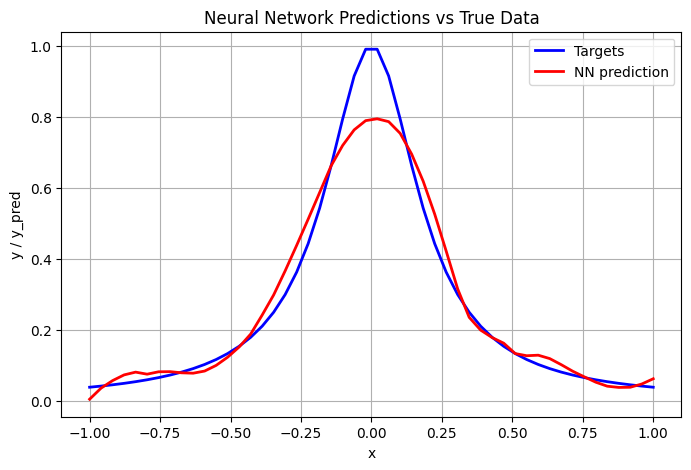

i = 50, j = 60
Validation loss: 0.0009667021979840011
Final test loss: 0.000668165915312184
[[0.14405816]
 [0.09046823]
 [0.44201565]
 [0.03435784]
 [0.30931475]
 [0.02881798]
 [0.89412532]
 [0.93913336]
 [0.25673428]
 [0.47451917]]


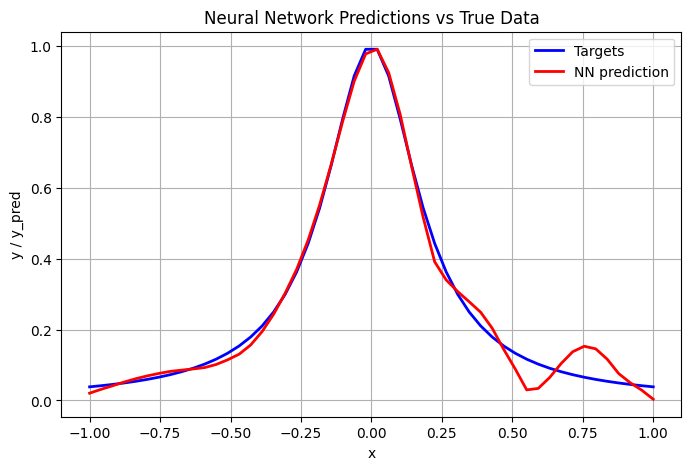

i = 50, j = 70
Validation loss: 0.003448211707297987
Final test loss: 0.005230421623890475
[[0.1254057 ]
 [0.14557346]
 [0.51873212]
 [0.0918572 ]
 [0.34728498]
 [0.05783648]
 [0.82369111]
 [0.84804796]
 [0.33567652]
 [0.54359154]]


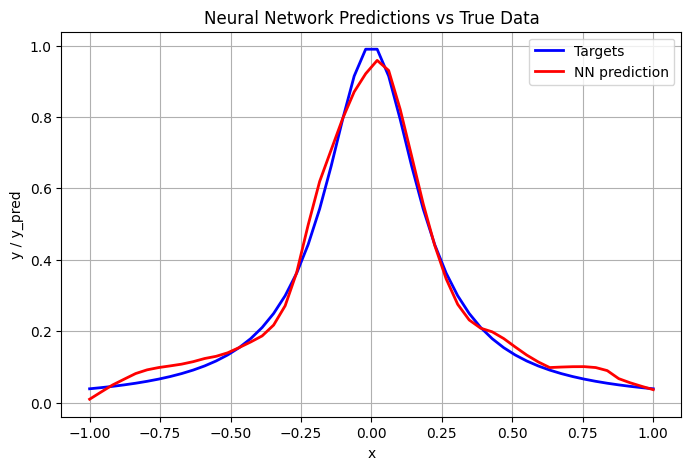

i = 50, j = 80
Validation loss: 0.0026440483711951623
Final test loss: 0.004386856233995212
[[0.13920646]
 [0.09403239]
 [0.51801442]
 [0.10094145]
 [0.28025319]
 [0.0350723 ]
 [0.80700978]
 [0.84094488]
 [0.33060683]
 [0.46808533]]


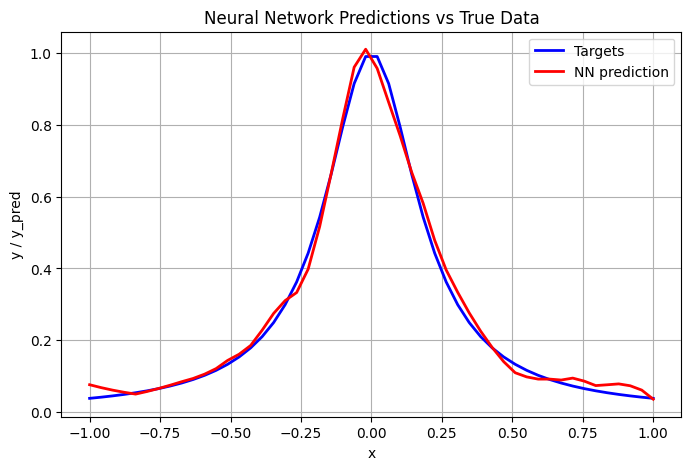

i = 50, j = 90
Validation loss: 0.0011734811908428035
Final test loss: 0.0011719154726383347
[[0.14531035]
 [0.1221401 ]
 [0.46212007]
 [0.0598021 ]
 [0.31009755]
 [0.03774664]
 [0.85944466]
 [0.91165857]
 [0.32147673]
 [0.47583212]]


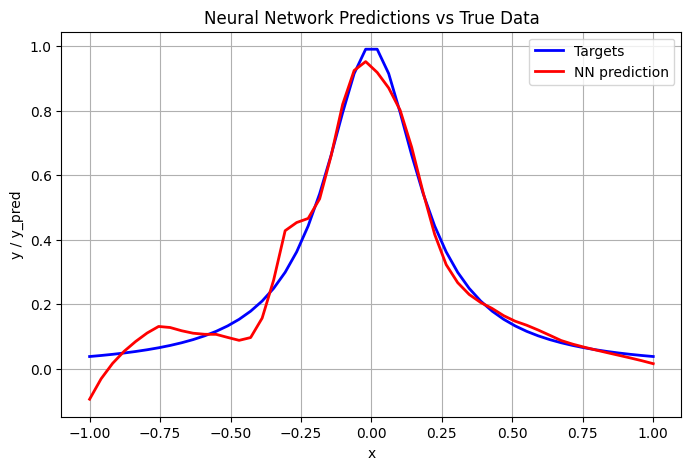

i = 50, j = 100
Validation loss: 0.001576518575349277
Final test loss: 0.0023721241159768112
[[0.18519395]
 [0.14461408]
 [0.45857932]
 [0.04471257]
 [0.23846966]
 [0.06010836]
 [0.85344546]
 [0.88037245]
 [0.31534074]
 [0.46828798]]


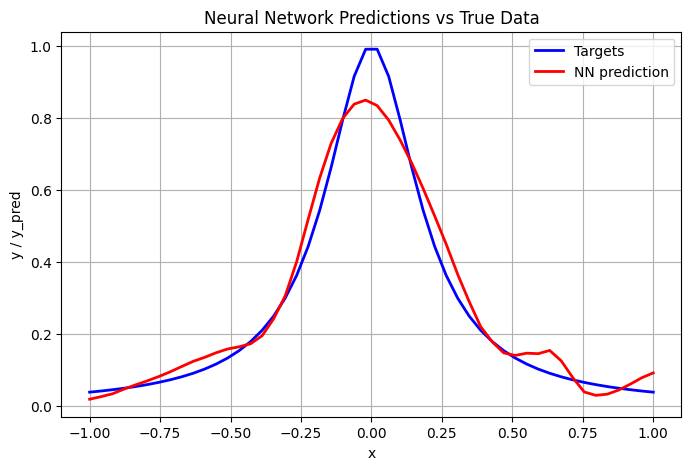

i = 60, j = 10
Validation loss: 0.002209363848418328
Final test loss: 0.0037785095882662935
[[0.17381593]
 [0.08678857]
 [0.49002107]
 [0.05967008]
 [0.34244227]
 [0.0780777 ]
 [0.82587283]
 [0.84350472]
 [0.32987512]
 [0.48128147]]


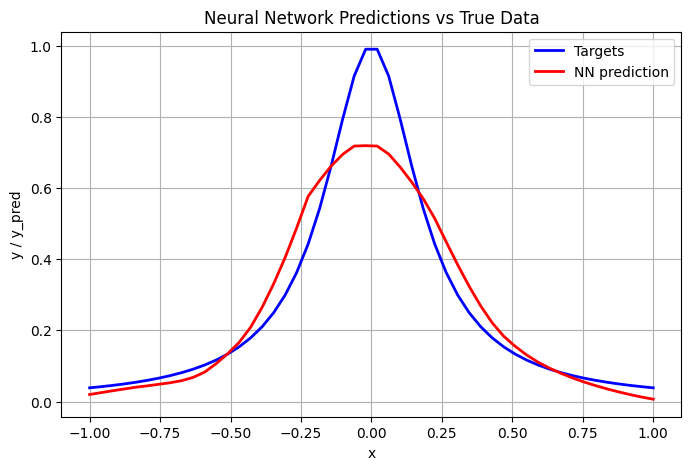

i = 60, j = 20
Validation loss: 0.009648037459153946
Final test loss: 0.017149637554239268
[[0.18951017]
 [0.12392389]
 [0.49212698]
 [0.07034725]
 [0.38339657]
 [0.00177641]
 [0.67144042]
 [0.68630771]
 [0.35640608]
 [0.50592734]]


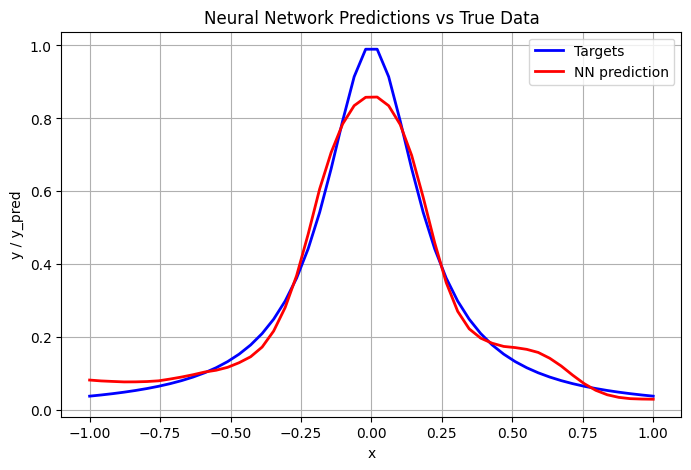

i = 60, j = 30
Validation loss: 0.002492755161805424
Final test loss: 0.00315776215897857
[[0.16242928]
 [0.08113437]
 [0.44032775]
 [0.05970277]
 [0.33929764]
 [0.06992015]
 [0.83718977]
 [0.85190389]
 [0.30172128]
 [0.50296356]]


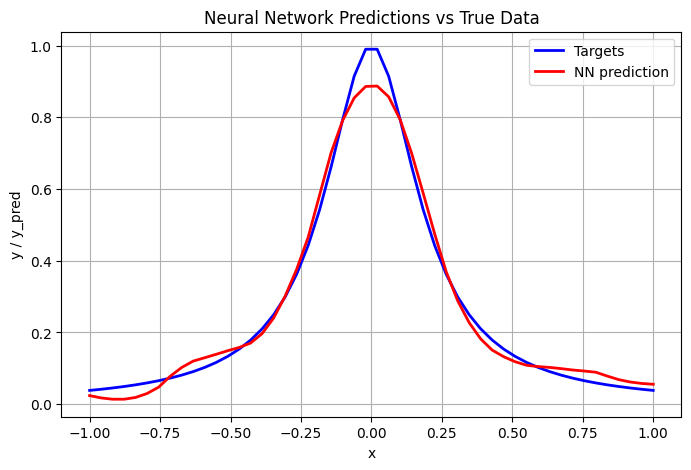

i = 60, j = 40
Validation loss: 0.0029902804468715013
Final test loss: 0.006339188410012055
[[0.17489627]
 [0.08662823]
 [0.52351751]
 [0.09878303]
 [0.33086126]
 [0.02462476]
 [0.78182384]
 [0.83033217]
 [0.37138577]
 [0.51075428]]


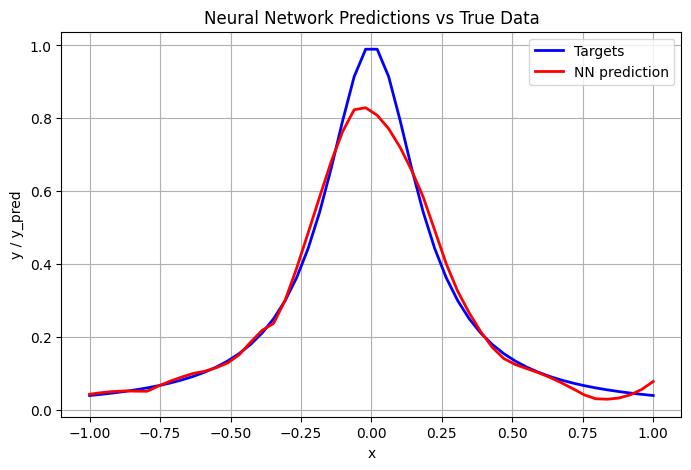

i = 60, j = 50
Validation loss: 0.0008302975026888657
Final test loss: 0.000392723420503697
[[0.13631661]
 [0.13113166]
 [0.42814383]
 [0.09063422]
 [0.30460631]
 [0.05602325]
 [0.94320124]
 [0.98848599]
 [0.31268798]
 [0.43988393]]


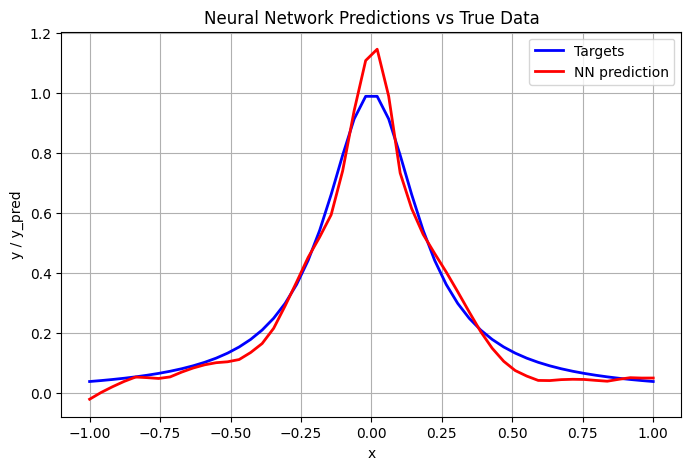

i = 60, j = 60
Validation loss: 0.0009594549652117406
Final test loss: 0.004498093401238347
[[0.12345385]
 [0.06440127]
 [0.34782153]
 [0.01084592]
 [0.30962778]
 [0.01792617]
 [1.03079952]
 [1.08424035]
 [0.21724207]
 [0.39892631]]


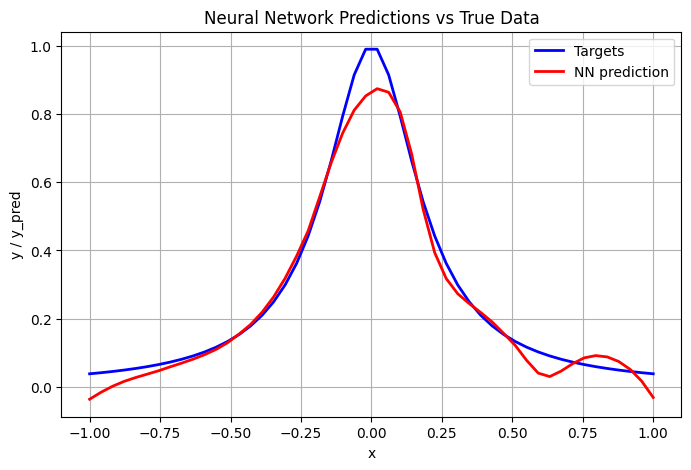

i = 60, j = 70
Validation loss: 0.0013861661831338675
Final test loss: 0.0017042620060254844
[[0.09347404]
 [0.06357837]
 [0.45071704]
 [0.06878989]
 [0.30448885]
 [0.01232177]
 [0.86441668]
 [0.91500816]
 [0.29477897]
 [0.49392612]]


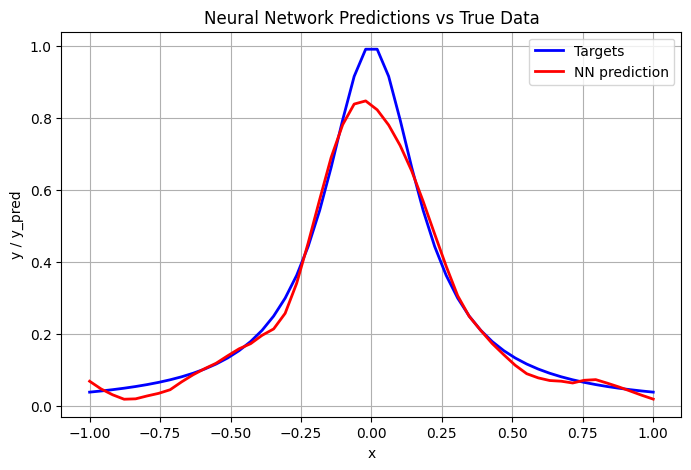

i = 60, j = 80
Validation loss: 0.00034324637184392616
Final test loss: 0.00019918912406888197
[[0.14254786]
 [0.09742595]
 [0.45331879]
 [0.05185556]
 [0.29930186]
 [0.03681735]
 [0.90330573]
 [0.96719215]
 [0.30734463]
 [0.47416486]]


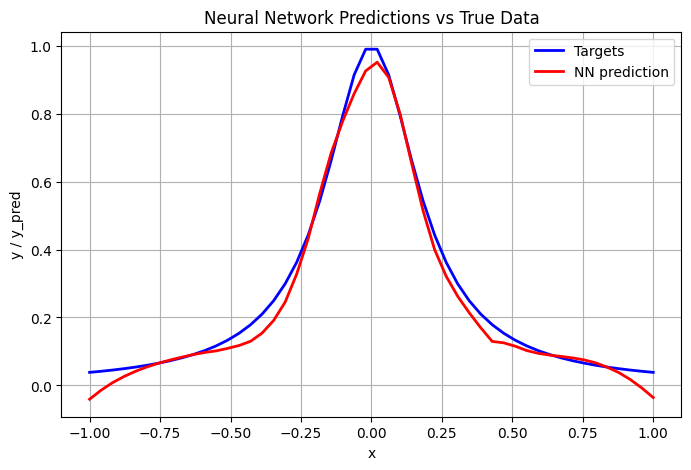

i = 60, j = 90
Validation loss: 0.0014954370170916133
Final test loss: 0.0008077066710351936
[[0.14963693]
 [0.14945909]
 [0.48230981]
 [0.04097874]
 [0.30159506]
 [0.05631779]
 [0.92602689]
 [0.92892955]
 [0.3004821 ]
 [0.44939361]]


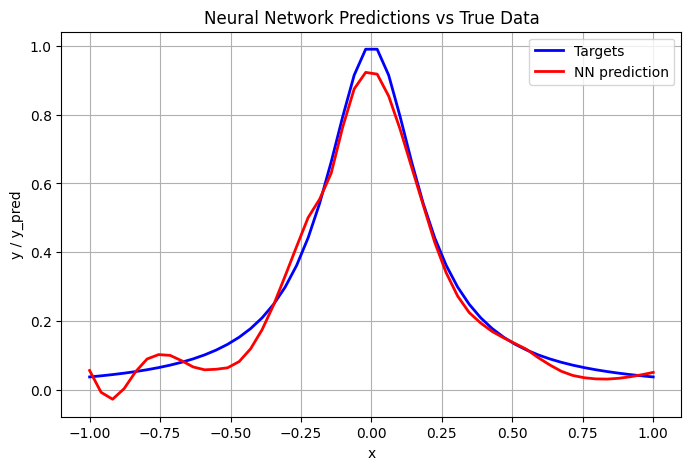

i = 60, j = 100
Validation loss: 0.002687798393011244
Final test loss: 0.005365906733735841
[[0.1910564 ]
 [0.11049472]
 [0.50359278]
 [0.07556693]
 [0.3902005 ]
 [0.11113426]
 [0.84849966]
 [0.86512466]
 [0.35570354]
 [0.55129696]]


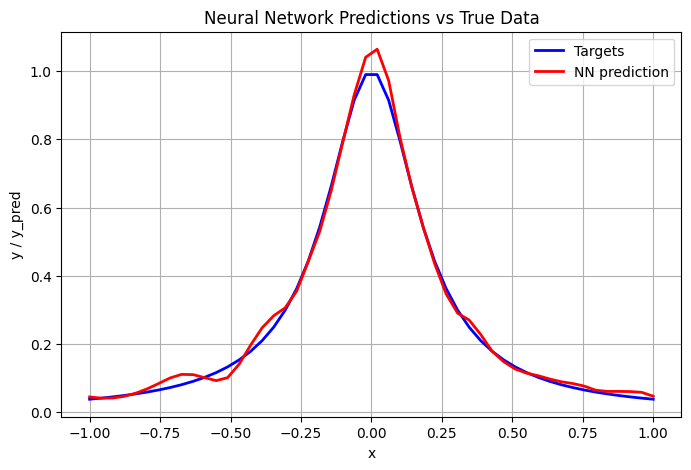

i = 70, j = 10
Validation loss: 0.0028240475293075575
Final test loss: 0.004945511806398793
[[0.13716896]
 [0.10535343]
 [0.49824202]
 [0.06158464]
 [0.31907406]
 [0.04242392]
 [0.80357339]
 [0.82584836]
 [0.34250908]
 [0.51049677]]


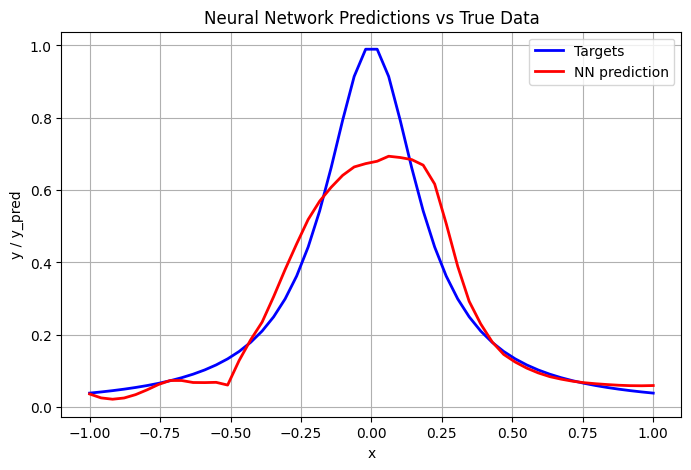

i = 70, j = 20
Validation loss: 0.006166681090905684
Final test loss: 0.01217915091530493
[[ 0.16201569]
 [ 0.12762179]
 [ 0.51573324]
 [ 0.04112374]
 [ 0.37210752]
 [-0.0019724 ]
 [ 0.72209139]
 [ 0.74711197]
 [ 0.38318568]
 [ 0.51648587]]


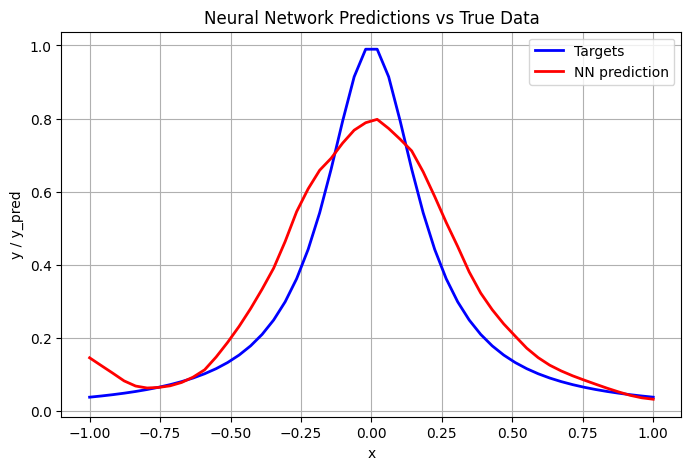

i = 70, j = 30
Validation loss: 0.00920980541072993
Final test loss: 0.015092842243823673
[[0.05962586]
 [0.08961764]
 [0.55208252]
 [0.15588707]
 [0.22936608]
 [0.07373067]
 [0.71404606]
 [0.73564852]
 [0.35951981]
 [0.51564158]]


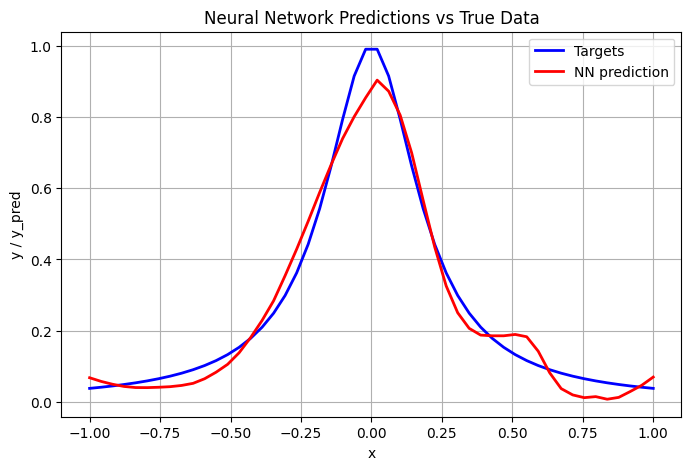

i = 70, j = 40
Validation loss: 0.0013707079140074037
Final test loss: 0.0006836261329344952
[[0.159061  ]
 [0.09241776]
 [0.42302044]
 [0.02955863]
 [0.33188068]
 [0.01853102]
 [0.90547854]
 [0.9357328 ]
 [0.28733332]
 [0.47397059]]


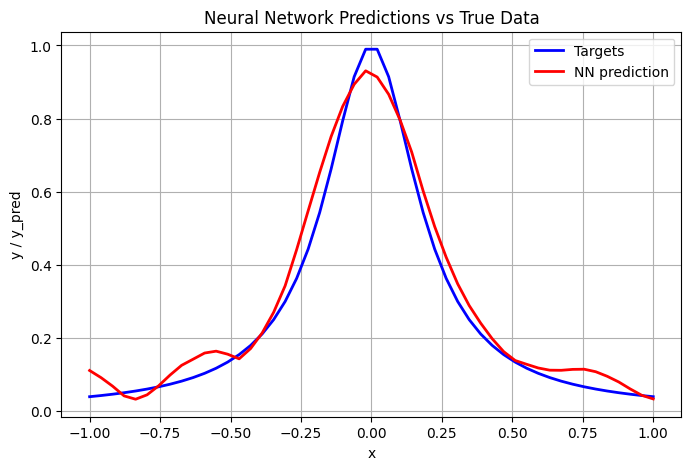

i = 70, j = 50
Validation loss: 0.0032333296037218443
Final test loss: 0.0058086574519526715
[[0.12944376]
 [0.08029679]
 [0.50304104]
 [0.04307478]
 [0.29921754]
 [0.05220909]
 [0.78817238]
 [0.8079563 ]
 [0.33837855]
 [0.49378742]]


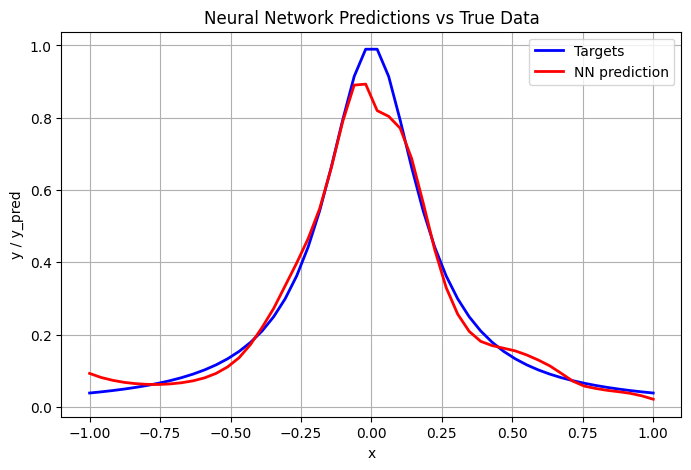

i = 70, j = 60
Validation loss: 0.00688985638320027
Final test loss: 0.015159478884360469
[[0.11988522]
 [0.17909659]
 [0.54952018]
 [0.09705319]
 [0.44096692]
 [0.09931548]
 [0.76087998]
 [0.77017514]
 [0.2844343 ]
 [0.63197037]]


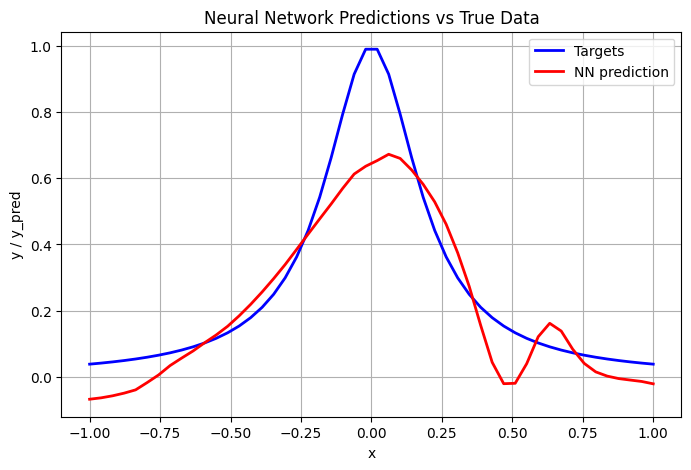

i = 70, j = 70
Validation loss: 0.0008235711557326861
Final test loss: 0.0022669328616421115
[[0.16869094]
 [0.10525789]
 [0.40719089]
 [0.04653337]
 [0.30988904]
 [0.01687306]
 [1.00469996]
 [1.10001291]
 [0.29725121]
 [0.43474865]]


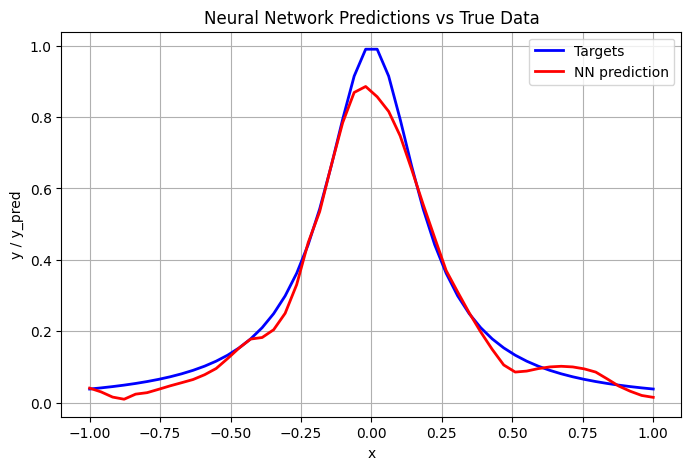

i = 70, j = 80
Validation loss: 0.0015723150613062755
Final test loss: 0.001950686545969126
[[0.1352064 ]
 [0.06871848]
 [0.42917358]
 [0.06587256]
 [0.27508611]
 [0.02746818]
 [0.85298204]
 [0.88463911]
 [0.26759636]
 [0.47615803]]


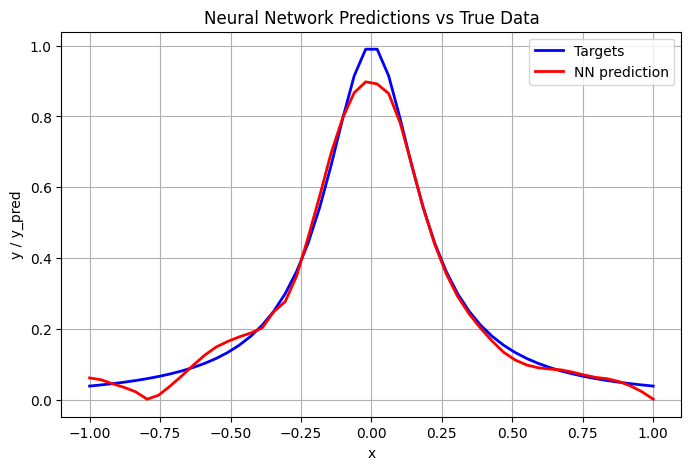

i = 70, j = 90
Validation loss: 0.002357192501522623
Final test loss: 0.0018095183075843909
[[ 0.09291931]
 [ 0.0342903 ]
 [ 0.44577251]
 [ 0.11321809]
 [ 0.25357877]
 [-0.00366088]
 [ 0.88878942]
 [ 0.96215997]
 [ 0.30485077]
 [ 0.46836154]]


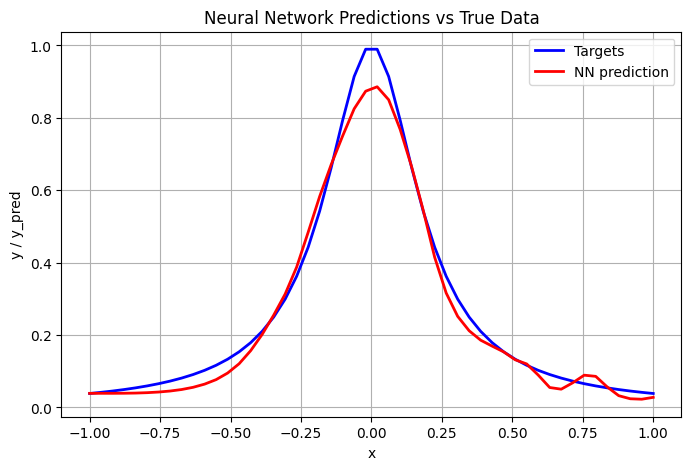

i = 70, j = 100
Validation loss: 0.00398290920505291
Final test loss: 0.002563465665056649
[[0.27262509]
 [0.18172146]
 [0.47896201]
 [0.07981993]
 [0.2661198 ]
 [0.04343496]
 [0.92844194]
 [0.95354655]
 [0.28829422]
 [0.4646604 ]]


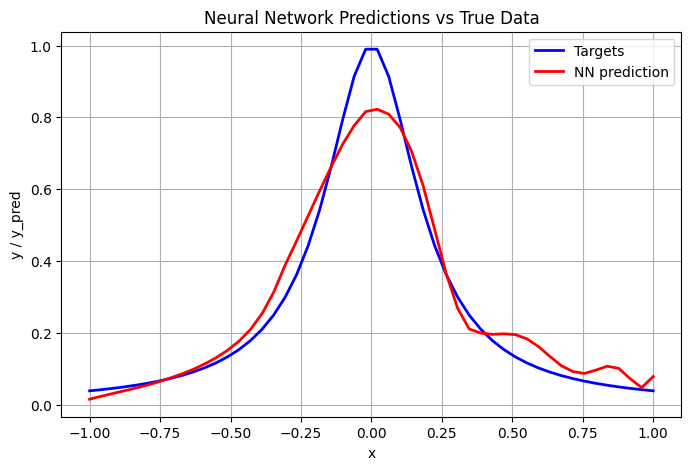

i = 80, j = 10
Validation loss: 0.009271118596388466
Final test loss: 0.018312719541478614
[[0.20522981]
 [0.1173666 ]
 [0.48916405]
 [0.05438391]
 [0.44589265]
 [0.03264273]
 [0.6831953 ]
 [0.70031333]
 [0.36666775]
 [0.56389228]]


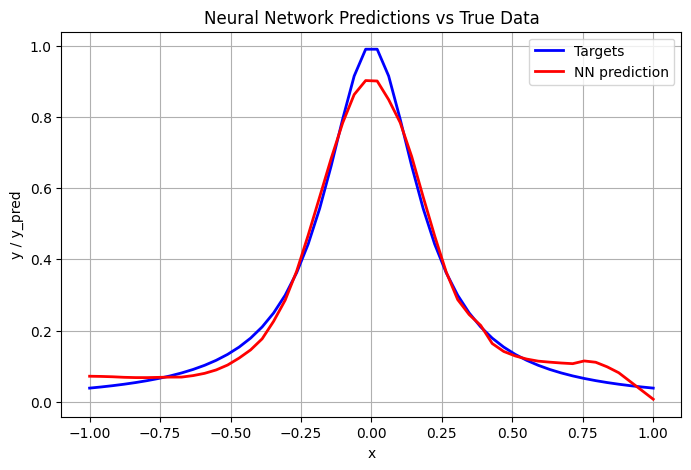

i = 80, j = 20
Validation loss: 0.003371145711995007
Final test loss: 0.005111163284727778
[[0.16705518]
 [0.08638541]
 [0.43305385]
 [0.06173848]
 [0.2861484 ]
 [0.06778955]
 [0.84434247]
 [0.81362167]
 [0.3360328 ]
 [0.55391732]]


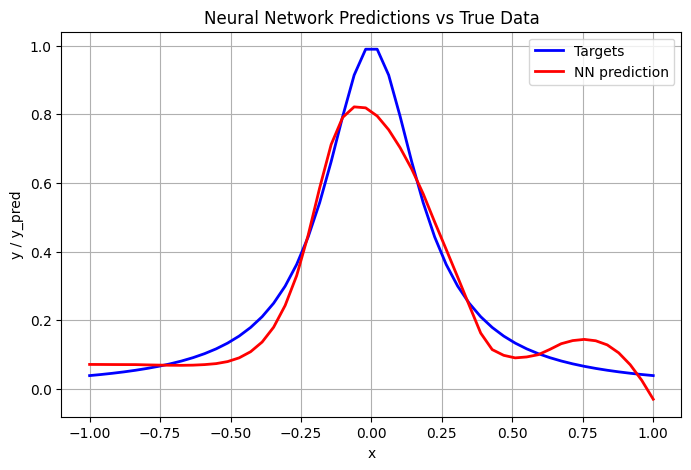

i = 80, j = 30
Validation loss: 0.0031516509756540296
Final test loss: 0.002776641193623022
[[ 0.15173712]
 [-0.01895603]
 [ 0.42673871]
 [ 0.14455805]
 [ 0.29118431]
 [ 0.00805848]
 [ 0.93384659]
 [ 1.02959387]
 [ 0.29606622]
 [ 0.4051339 ]]


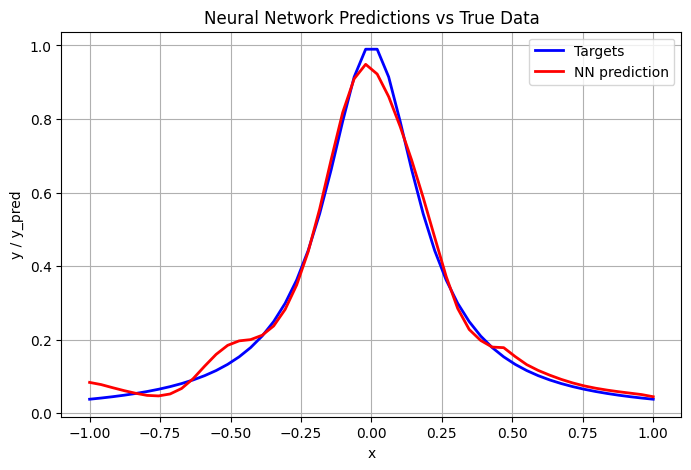

i = 80, j = 40
Validation loss: 0.00525490669650537
Final test loss: 0.007311661596663678
[[0.1866626 ]
 [0.08209935]
 [0.46117178]
 [0.05715037]
 [0.37487326]
 [0.07393256]
 [0.7756116 ]
 [0.79590754]
 [0.27636172]
 [0.52714839]]


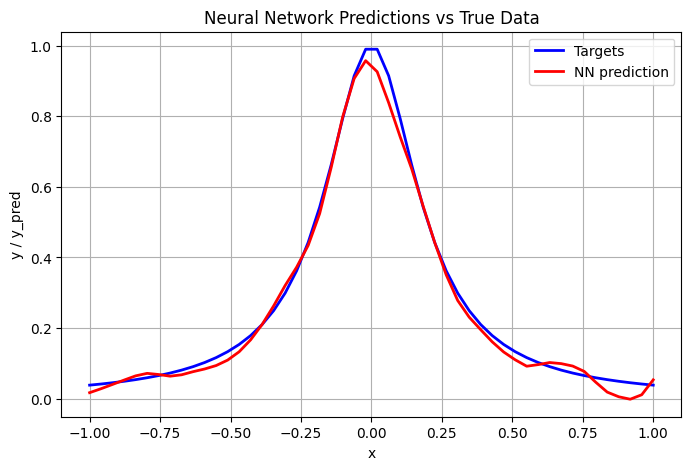

i = 80, j = 50
Validation loss: 0.0042716836025519424
Final test loss: 0.008114154802917831
[[ 0.12593031]
 [-0.00111277]
 [ 0.47620803]
 [ 0.03980484]
 [ 0.26203132]
 [ 0.03932677]
 [ 0.75111732]
 [ 0.80901308]
 [ 0.38368722]
 [ 0.42037108]]


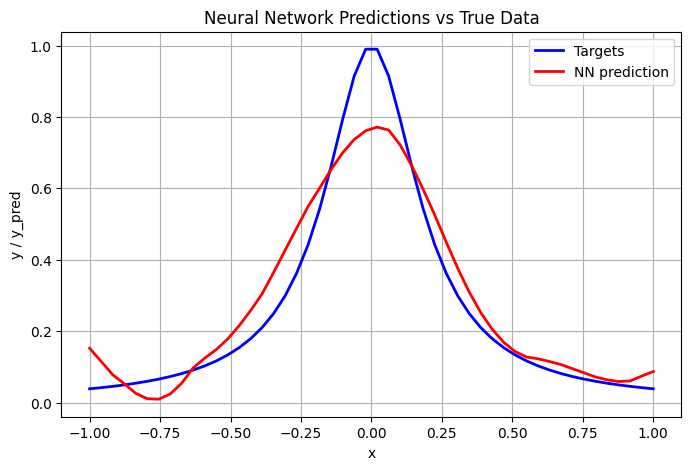

i = 80, j = 60
Validation loss: 0.0009270132112165293
Final test loss: 0.0013568690698096643
[[0.14040956]
 [0.11046544]
 [0.42664066]
 [0.03174173]
 [0.30804331]
 [0.04577568]
 [0.8630206 ]
 [0.89544609]
 [0.27564429]
 [0.46294148]]


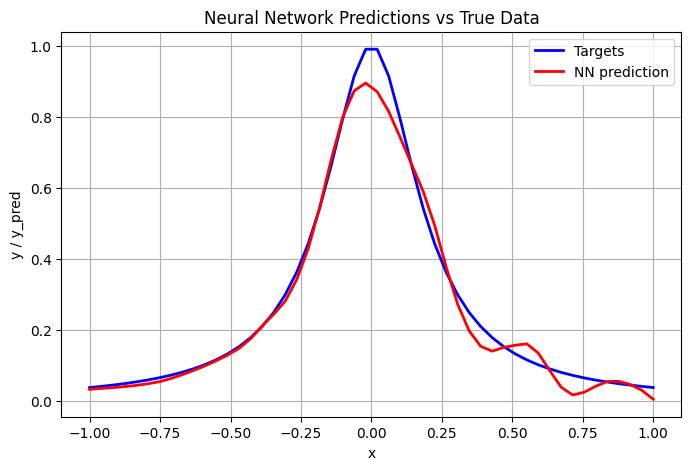

i = 80, j = 70
Validation loss: 0.003599375857627163
Final test loss: 0.012859317450581234
[[ 0.1511098 ]
 [ 0.00095094]
 [ 0.48048826]
 [ 0.00782526]
 [ 0.28111605]
 [-0.0165019 ]
 [ 0.68588877]
 [ 0.76308867]
 [ 0.3521308 ]
 [ 0.37430391]]


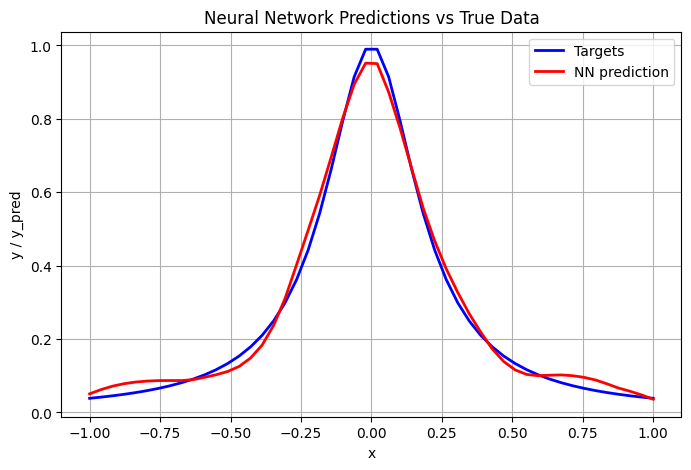

i = 80, j = 80
Validation loss: 0.0020642420725294967
Final test loss: 0.0028762723078561954
[[0.1422    ]
 [0.04518198]
 [0.45663983]
 [0.0768553 ]
 [0.26910925]
 [0.01695716]
 [0.82108169]
 [0.88217625]
 [0.32348107]
 [0.39487151]]


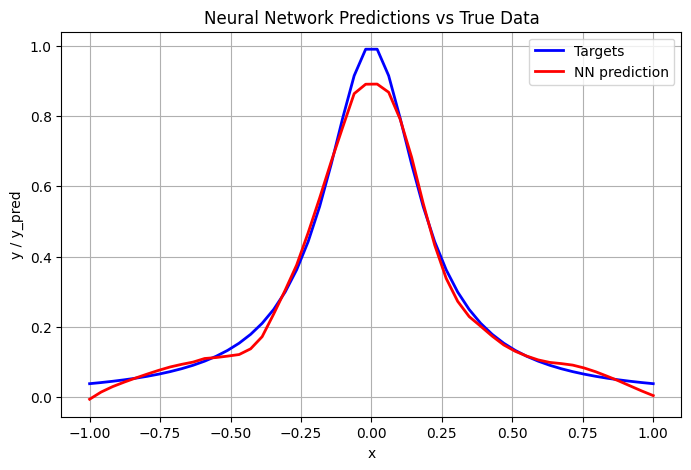

i = 80, j = 90
Validation loss: 0.003216345103255279
Final test loss: 0.0017153934191893126
[[0.15000435]
 [0.13379449]
 [0.45780149]
 [0.0241655 ]
 [0.31941591]
 [0.03136514]
 [0.8614976 ]
 [0.89524416]
 [0.33182995]
 [0.40080485]]


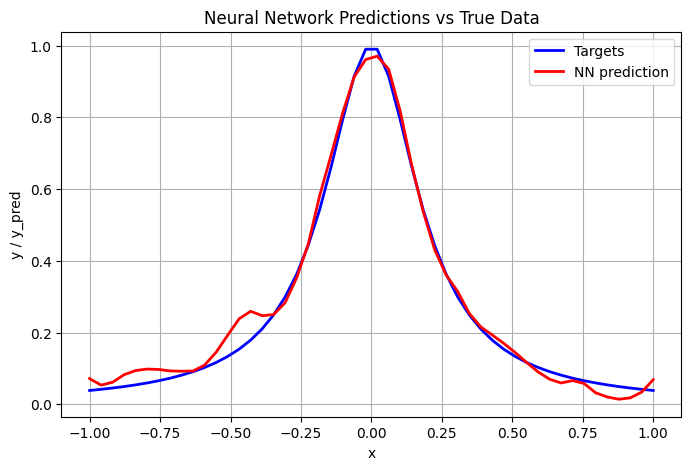

i = 80, j = 100
Validation loss: 0.0018273196072447963
Final test loss: 0.0036430258494502786
[[0.19460943]
 [0.09846152]
 [0.47647523]
 [0.0500664 ]
 [0.25205676]
 [0.04009701]
 [0.80875547]
 [0.84922707]
 [0.31748177]
 [0.43086866]]


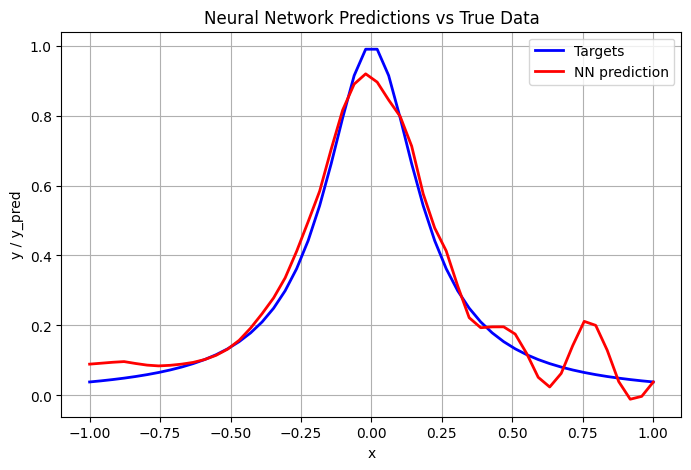

i = 90, j = 10
Validation loss: 0.0744761475829764
Final test loss: 0.13534577833746317
[[0.1944748 ]
 [0.19020964]
 [0.19084249]
 [0.19001136]
 [0.19497126]
 [0.18983348]
 [0.19240279]
 [0.19286245]
 [0.19053936]
 [0.19436464]]


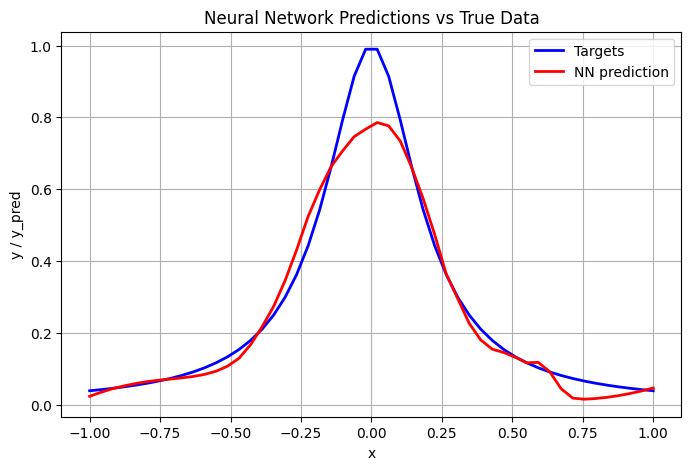

i = 90, j = 20
Validation loss: 0.002628454468231595
Final test loss: 0.003739815238061506
[[0.14238062]
 [0.06303661]
 [0.52356507]
 [0.04899303]
 [0.33857511]
 [0.06408178]
 [0.84501266]
 [0.8603229 ]
 [0.34764347]
 [0.49878989]]


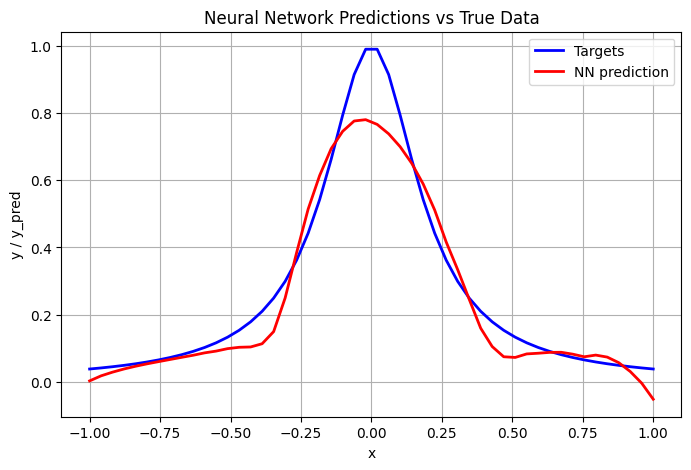

i = 90, j = 30
Validation loss: 0.0029092477572148644
Final test loss: 0.0054630351122501196
[[0.12765656]
 [0.09935593]
 [0.54080241]
 [0.04009514]
 [0.31859375]
 [0.05511365]
 [0.79415079]
 [0.82607299]
 [0.32359316]
 [0.48394725]]


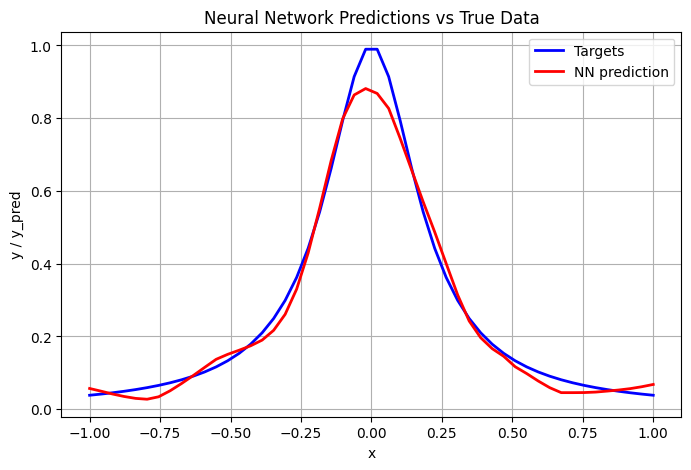

i = 90, j = 40
Validation loss: 0.001348159919373585
Final test loss: 0.0014003277034823009
[[ 0.12811583]
 [ 0.12310473]
 [ 0.42942709]
 [-0.02241579]
 [ 0.30542837]
 [ 0.02975911]
 [ 0.88885835]
 [ 0.94307572]
 [ 0.23665379]
 [ 0.44196865]]


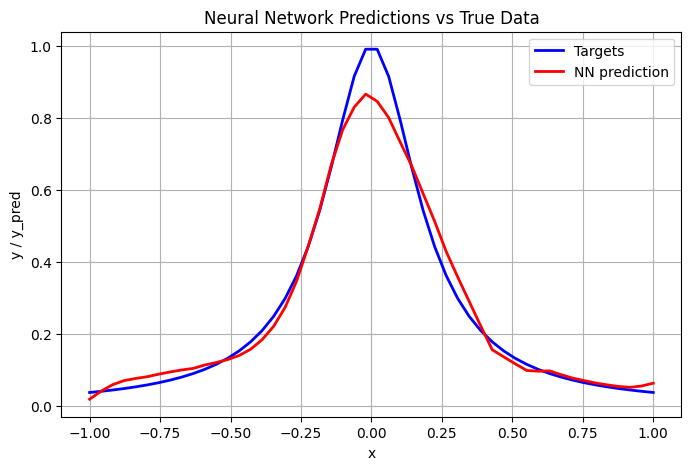

i = 90, j = 50
Validation loss: 0.001027927901965366
Final test loss: 0.0017189403385963673
[[0.16365265]
 [0.11516905]
 [0.45999065]
 [0.05998072]
 [0.32666245]
 [0.05217127]
 [0.81955642]
 [0.92093423]
 [0.25934088]
 [0.46317642]]


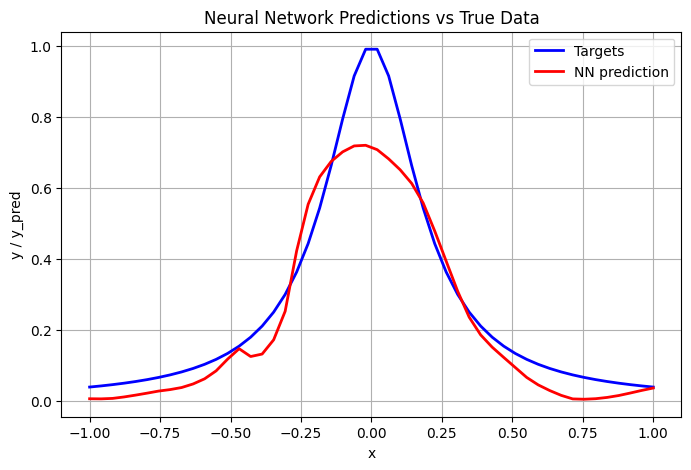

i = 90, j = 60
Validation loss: 0.003761609358688431
Final test loss: 0.002055771067940296
[[ 0.20486417]
 [ 0.10780502]
 [ 0.44920059]
 [-0.04144139]
 [ 0.2620711 ]
 [ 0.07436183]
 [ 0.96226051]
 [ 1.04741503]
 [ 0.31181311]
 [ 0.46508275]]


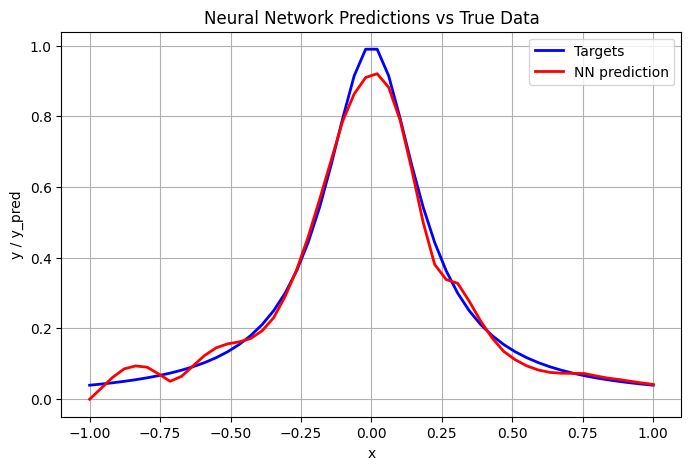

i = 90, j = 70
Validation loss: 0.004072937001220261
Final test loss: 0.013006425748081996
[[0.15699137]
 [0.08831885]
 [0.43704888]
 [0.12463473]
 [0.29346668]
 [0.01066184]
 [0.70101403]
 [0.70993415]
 [0.30300617]
 [0.43435372]]


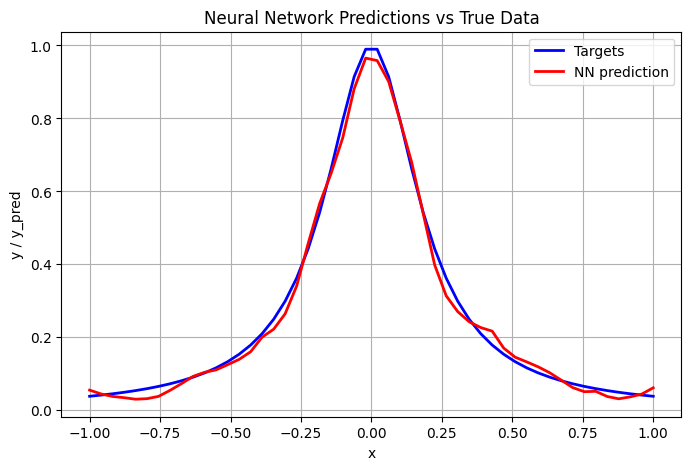

i = 90, j = 80
Validation loss: 0.0023796491892058174
Final test loss: 0.0032268908070965186
[[0.08936478]
 [0.10135987]
 [0.46727304]
 [0.06506377]
 [0.30623139]
 [0.02961738]
 [0.82753724]
 [0.85380435]
 [0.2966508 ]
 [0.47714868]]


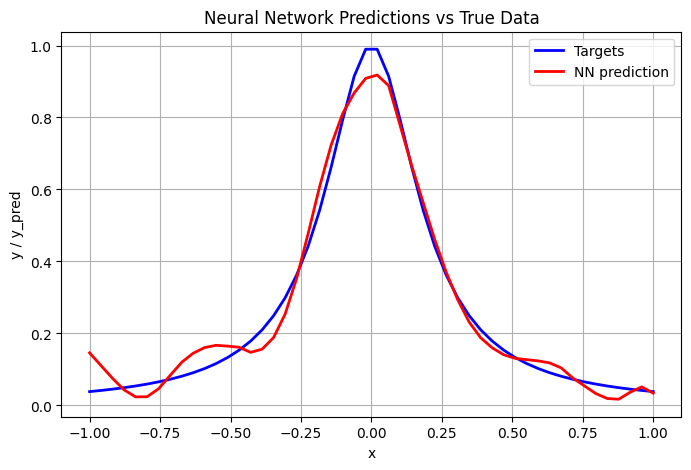

i = 90, j = 90
Validation loss: 0.0011711466753519368
Final test loss: 0.0026264241484820683
[[0.19291585]
 [0.08923929]
 [0.49626297]
 [0.07321142]
 [0.27513818]
 [0.03637206]
 [0.82470214]
 [0.88564405]
 [0.30506469]
 [0.40016866]]


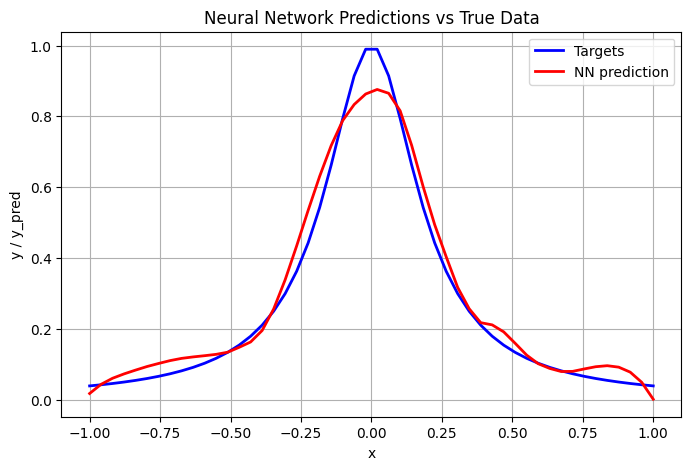

i = 90, j = 100
Validation loss: 0.0037599219561119833
Final test loss: 0.0015303022817615517
[[0.16244536]
 [0.07757523]
 [0.44860435]
 [0.05208187]
 [0.31450008]
 [0.03549519]
 [0.83472087]
 [0.9113248 ]
 [0.30467968]
 [0.40028634]]


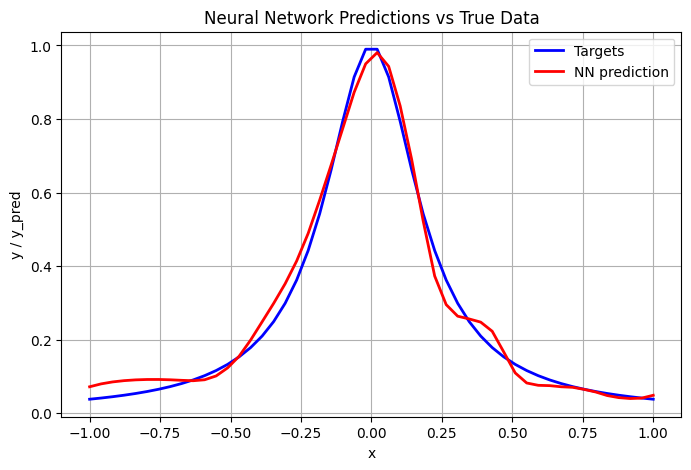

i = 100, j = 10
Validation loss: 0.001966397244881311
Final test loss: 0.0018245528886755738
[[0.10642894]
 [0.13369618]
 [0.39607367]
 [0.04142652]
 [0.26369458]
 [0.04556899]
 [0.88525314]
 [0.9072709 ]
 [0.24204063]
 [0.46604249]]


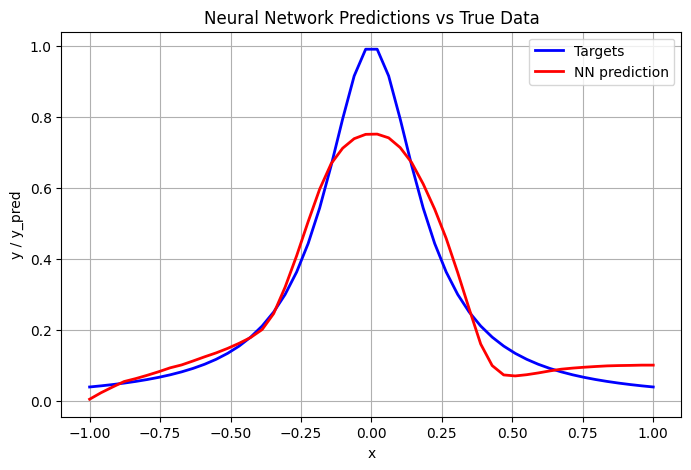

i = 100, j = 20
Validation loss: 0.003832757930359971
Final test loss: 0.009958322368919508
[[0.13577493]
 [0.09874479]
 [0.54786138]
 [0.08277726]
 [0.33329051]
 [0.07235765]
 [0.73657901]
 [0.77160696]
 [0.34413563]
 [0.50604608]]


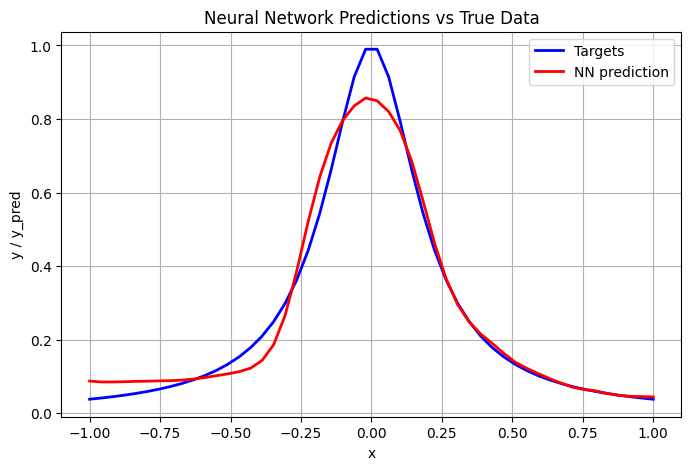

i = 100, j = 30
Validation loss: 0.005624565016444126
Final test loss: 0.010075950957205123
[[0.05746206]
 [0.05670192]
 [0.47647684]
 [0.03614918]
 [0.2914124 ]
 [0.06778798]
 [0.73839484]
 [0.76951932]
 [0.3359957 ]
 [0.52255476]]


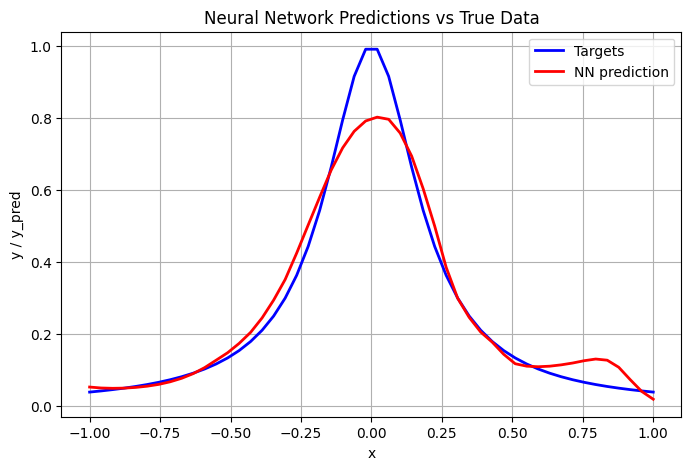

i = 100, j = 40
Validation loss: 0.000802567828712673
Final test loss: 0.000765507732894708
[[0.1231638 ]
 [0.0998281 ]
 [0.4185079 ]
 [0.05673511]
 [0.32247401]
 [0.0400186 ]
 [0.98766098]
 [0.9998116 ]
 [0.30603096]
 [0.45025216]]


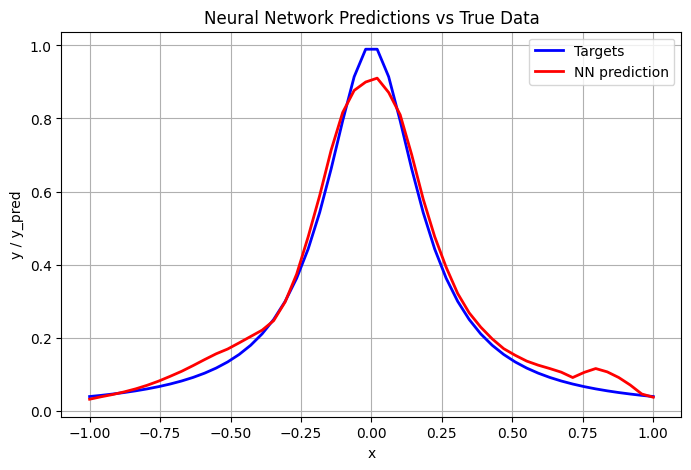

i = 100, j = 50
Validation loss: 0.0016489044562124247
Final test loss: 0.005186737055407572
[[0.1522528 ]
 [0.08819552]
 [0.48595985]
 [0.08976331]
 [0.31374049]
 [0.05512037]
 [1.083808  ]
 [1.10658967]
 [0.37467303]
 [0.43965606]]


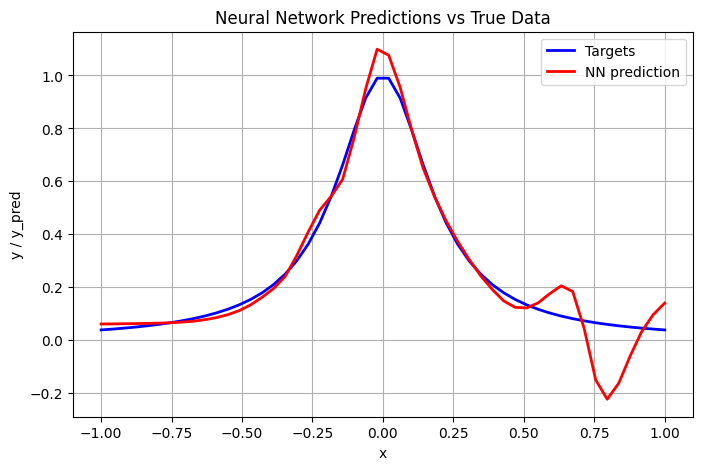

i = 100, j = 60
Validation loss: 0.0005066996836481467
Final test loss: 0.0005114592974477258
[[0.13715271]
 [0.05815393]
 [0.44166356]
 [0.09579124]
 [0.27523457]
 [0.04547837]
 [0.91436287]
 [0.99630663]
 [0.27999666]
 [0.4541439 ]]


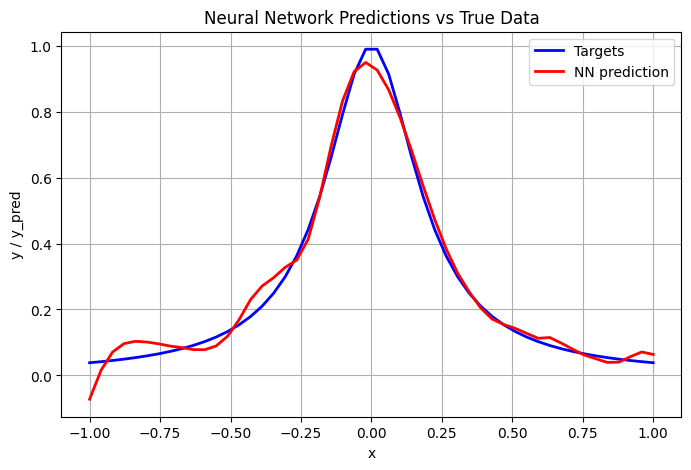

i = 100, j = 70
Validation loss: 0.0016345209316944397
Final test loss: 0.0027614025453634454
[[0.12954204]
 [0.13226526]
 [0.4844515 ]
 [0.06954448]
 [0.27589443]
 [0.07790164]
 [0.8432546 ]
 [0.87430425]
 [0.30299598]
 [0.50504606]]


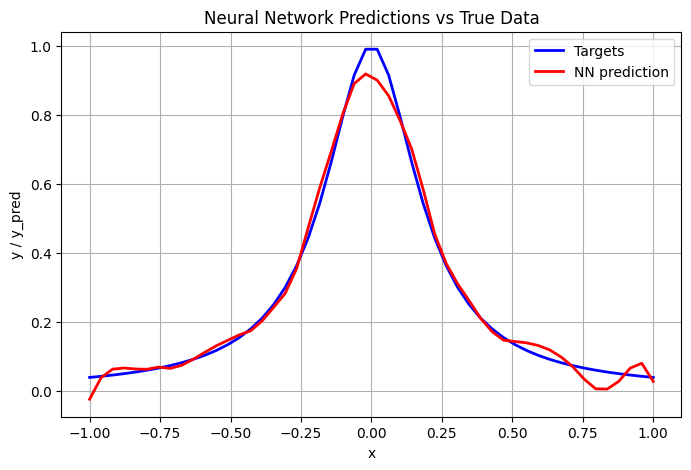

i = 100, j = 80
Validation loss: 0.0011950582495863994
Final test loss: 0.003374371784291186
[[0.17667273]
 [0.0656546 ]
 [0.49845267]
 [0.0755931 ]
 [0.27406766]
 [0.03744371]
 [0.80438937]
 [0.86927886]
 [0.28738201]
 [0.41263912]]


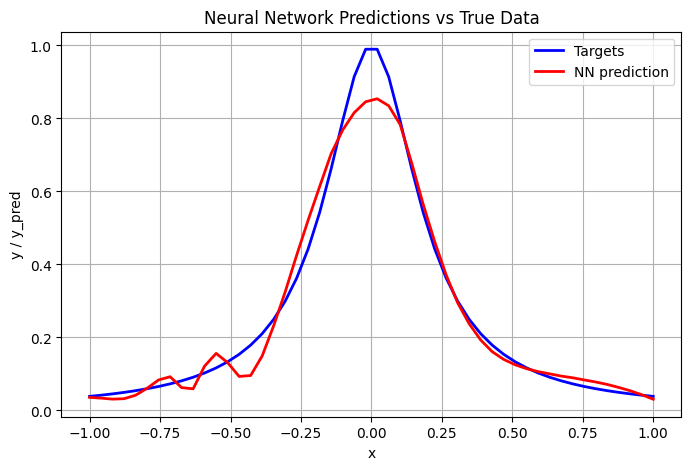

i = 100, j = 90
Validation loss: 0.0008148878111388008
Final test loss: 0.002693934217554198
[[0.10320352]
 [0.07655596]
 [0.45570673]
 [0.05590144]
 [0.31726318]
 [0.03705697]
 [0.8307516 ]
 [0.86983536]
 [0.31015906]
 [0.40098563]]


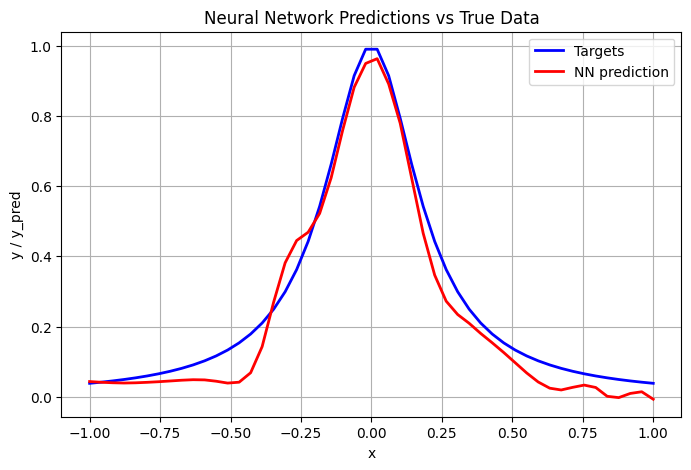

i = 100, j = 100
Validation loss: 0.0010409598702719404
Final test loss: 0.0026341373996889737
[[0.17542431]
 [0.11283295]
 [0.51448029]
 [0.03272512]
 [0.29901996]
 [0.04979305]
 [0.82115693]
 [0.89501343]
 [0.33509561]
 [0.40898673]]


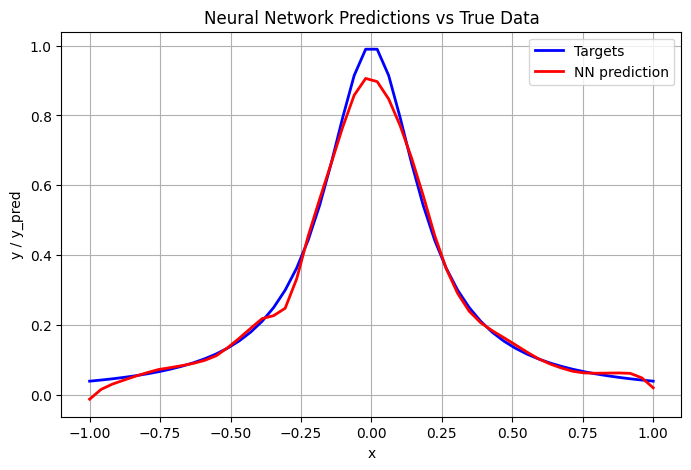

In [34]:
for i in range(10,110,10):
    #Initialize NN
    for j in range(10,110,10):
        print(f"i = {i}, j = {j}")
        nn = NeuralNetwork(
            network_input_size=X_train.shape[1],
            layer_output_sizes=[i, j, 1],
            activation_funcs=[af.ReLU, af.sigmoid, af.identity],
            cost_func=cf.mse)


        train_network_stochastic_momentum(nn, X_train, y_train, eta=0.01, epochs=100)

        y_val_pred = nn.predict(X_val)
        val_loss = cf.mse(y_val, y_val_pred)
        print("Validation loss:", val_loss)

        y_test_pred = nn.predict(X_test)
        test_loss = cf.mse(y_test, y_test_pred)
        print("Final test loss:", test_loss)


        plt.figure(figsize=(8, 5))
        plt.plot(x, y, color='blue', linewidth=2, label='Targets')
        plt.plot(x, nn.predict(x), color='red', linewidth=2, label='NN prediction')
        plt.title("Neural Network Predictions vs True Data")
        plt.xlabel("x")
        plt.ylabel("y / y_pred")
        plt.legend()
        plt.grid(True)
        plt.show()
